
## Final Project

### Rules of Engagement: 

This is an **honor system assignment**: You may consult your professor, your lab instructor, the textbook, and material on the Internet at any time. You may not consult, collaborate, or seek assistance from any other human besides your professor and lab instructor. Your attribution statement, at the top of your R-code file, should reflect these constraints. 


# Final Project

The overall goal of the case is to provide actionable insight, based on the data available, as well as accurately predict which people (customers) will be expensive. 
The dataset contains healthcare cost information from an HMO (Health Management Organization). Each row in the dataset represents a person. 
Your team’s goal is to understand the key drivers for why some people are more expensive (i.e., require more health care), as well as predict which people will be expensive (in terms of health care costs). Hence, at a high level, you have two goals:


*   Predict people who will spend a lot of money on health care next year (i.e., which people will have high healthcare costs).
*   Provide actionable insight to the HMO, in terms of how to lower their total health care costs, by providing a specific recommendation on how to lower health care costs.

The following report consists of the following items:

1. Data exploration and cleaning
2. Data modeling, prediction and visualizations.
3. Actionable Insights.

The report includes the best working model, models which were tested and not selected. Few steps like using the str(), hist() are repeatedly used to check the new updates on the dataframes.

This report is a combined result of the team effort including:
1. Ashish Kulkarni
2. Jordan Jones
3. Prabin Shrestha
4. Sandra Chiwike
5. Shachi Desai
6. Shoumik Reddy




---

##Business Overview
The	dataset	contains	healthcare cost	information from	an	HMO	(Health	Management	
Organization). Each row	in	the	dataset	represents a	person.	
The	goal	is	to	understand	the key	drivers	for	why	some	people spend more on healthcare cost	,	as	well	as	predict	which	people	will	be expensive in the next year.


Library

In [ ]:
# Setting up directory
dir.create('lib')

# Custom Function
EnsurePackage <- function(x){
  x <- as.character(x)
  if (!require(x, character.only = TRUE, lib.loc = 'lib/')){
    if (!require(x,character.only = TRUE)){
      install.packages(pkgs = x, lib = 'lib/', quiet = TRUE)
      require(x,character.only = TRUE, lib.loc = 'lib/')
    }
  }
}

In [ ]:
download.file('https://docs.google.com/uc?export=download&id=1FafesVrEhl6WMObKbbhMeo-Ar6UVgJ75&confirm=t','lib.zip')
unzip('lib.zip')

In [ ]:
EnsurePackage('imputeTS')
EnsurePackage('ggplot2')
EnsurePackage('Hmisc')
EnsurePackage('dplyr')
EnsurePackage('tidyverse')
EnsurePackage('caret')
EnsurePackage('kernlab')
EnsurePackage('maps')
EnsurePackage('mapproj')
EnsurePackage('ggmap')
EnsurePackage('R.utils')
EnsurePackage('httpuv')
EnsurePackage('googledrive') 
# EnsurePackage('rio')
# EnsurePackage('kernlab')

Loading required package: imputeTS

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: ggplot2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggplot2’”
Loading required package: ggplot2

Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: dplyr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘dplyr’”
Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: 

In [ ]:
# files2zip <- dir('lib', full.names = TRUE)
# zip(zipfile = 'lib', files = files2zip)

---

##Data Exploration and Processing

## Task 1: 
Predict people who will spend a lot of money on health care next year (i.e., which people will have high healthcare costs).

### Downloading Data

In [ ]:
#storing the source data url
datafile_url <- "https://intro-datascience.s3.us-east-2.amazonaws.com/HMO_data.csv"
#using read.csv() to create dataframe
HMO_data = read.csv(url(datafile_url))
#top 6 rows for data overview
head(HMO_data)

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost
,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,1746
2,2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,602
3,3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,576
4,4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,5562
5,5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,836
6,7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,3842


In [ ]:
#metadata
str(HMO_data)

'data.frame':	7582 obs. of  14 variables:
 $ X              : int  1 2 3 4 5 7 9 10 11 12 ...
 $ age            : int  18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num  27.9 33.8 33 22.7 28.9 ...
 $ children       : int  0 1 3 0 0 1 2 0 0 0 ...
 $ smoker         : chr  "yes" "no" "no" "no" ...
 $ location       : chr  "CONNECTICUT" "RHODE ISLAND" "MASSACHUSETTS" "PENNSYLVANIA" ...
 $ location_type  : chr  "Urban" "Urban" "Urban" "Country" ...
 $ education_level: chr  "Bachelor" "Bachelor" "Master" "Master" ...
 $ yearly_physical: chr  "No" "No" "No" "No" ...
 $ exercise       : chr  "Active" "Not-Active" "Active" "Not-Active" ...
 $ married        : chr  "Married" "Married" "Married" "Married" ...
 $ hypertension   : int  0 0 0 1 0 0 0 1 0 0 ...
 $ gender         : chr  "female" "male" "male" "male" ...
 $ cost           : int  1746 602 576 5562 836 3842 1304 9724 201 4492 ...


### Data Exploration

In [ ]:
# Making a copy of data
# We will be exploring and cleaning the copy of data
#converting categorical data into factor levels

df_HMO_data <- HMO_data
df_HMO_data$smoker <- as.factor(df_HMO_data$smoker)
df_HMO_data$location <- as.factor(df_HMO_data$location)
df_HMO_data$location_type <- as.factor(df_HMO_data$location_type)
df_HMO_data$education_level <- as.factor(df_HMO_data$education_level)
df_HMO_data$yearly_physical <- as.factor(df_HMO_data$yearly_physical)
df_HMO_data$exercise <- as.factor(df_HMO_data$exercise)
df_HMO_data$married <- as.factor(df_HMO_data$married)
df_HMO_data$gender <- as.factor(df_HMO_data$gender)

#metadata
str(df_HMO_data)

'data.frame':	7582 obs. of  14 variables:
 $ X              : int  1 2 3 4 5 7 9 10 11 12 ...
 $ age            : int  18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num  27.9 33.8 33 22.7 28.9 ...
 $ children       : int  0 1 3 0 0 1 2 0 0 0 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 2 ...
 $ location       : Factor w/ 7 levels "CONNECTICUT",..: 1 7 3 6 6 6 6 6 6 1 ...
 $ location_type  : Factor w/ 2 levels "Country","Urban": 2 2 2 1 1 2 2 1 2 2 ...
 $ education_level: Factor w/ 4 levels "Bachelor","Master",..: 1 1 2 2 4 1 1 1 1 3 ...
 $ yearly_physical: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ exercise       : Factor w/ 2 levels "Active","Not-Active": 1 2 1 2 2 2 1 2 1 1 ...
 $ married        : Factor w/ 2 levels "Married","Not_Married": 1 1 1 1 1 1 1 1 1 1 ...
 $ hypertension   : int  0 0 0 1 0 0 0 1 0 0 ...
 $ gender         : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 2 1 2 1 ...
 $ cost           : int  1746 602 576 5562 

In [ ]:
#statistical information of the dataframe
summary(df_HMO_data)

       X                  age             bmi           children     smoker    
 Min.   :        1   Min.   :18.00   Min.   :15.96   Min.   :0.000   no :6103  
 1st Qu.:     5635   1st Qu.:26.00   1st Qu.:26.60   1st Qu.:0.000   yes:1479  
 Median :    24916   Median :39.00   Median :30.50   Median :1.000             
 Mean   :   712602   Mean   :38.89   Mean   :30.80   Mean   :1.109             
 3rd Qu.:   118486   3rd Qu.:51.00   3rd Qu.:34.77   3rd Qu.:2.000             
 Max.   :131101111   Max.   :66.00   Max.   :53.13   Max.   :5.000             
                                     NA's   :78                                
          location    location_type           education_level yearly_physical
 CONNECTICUT  : 611   Country:1903   Bachelor         :4578   No :5699       
 MARYLAND     : 747   Urban  :5679   Master           :1533   Yes:1883       
 MASSACHUSETTS: 465                  No College Degree: 759                  
 NEW JERSEY   : 498                  PhD        

---

In [ ]:
# making a fuction to do the analysis 
hist_plot <- function (sample, breaks = 30) {
  # Code
  # 2.5% Threshold
  # the value for 2.5 % Threshold
  min_quantile <- quantile(sample, 0.025, na.rm = TRUE)
  # 97.5% Threshold
  # the value for 97.5 % Threshold
  max_quantile <- quantile(sample, 0.975, na.rm = TRUE)

  # Sample mean
  sample_mean <- mean(sample, na.rm = TRUE)
  sample_median <- median(sample, na.rm = TRUE)

  # Displaying histogram
  hist(sample, breaks = breaks)
  abline(v=sample_mean, lwd=3, col= 'blue') # Population mean line 
  abline(v=sample_median, lwd=3) # Population Median line 
  abline(v=min_quantile, lwd=3, lty='dashed') # 2.5% line 
  abline(v=max_quantile, lwd=3, lty='dashed') # 97.5% line 
  print(paste('Mean:', sample_mean ))
}

[1] "Mean: 4042.96122395146"


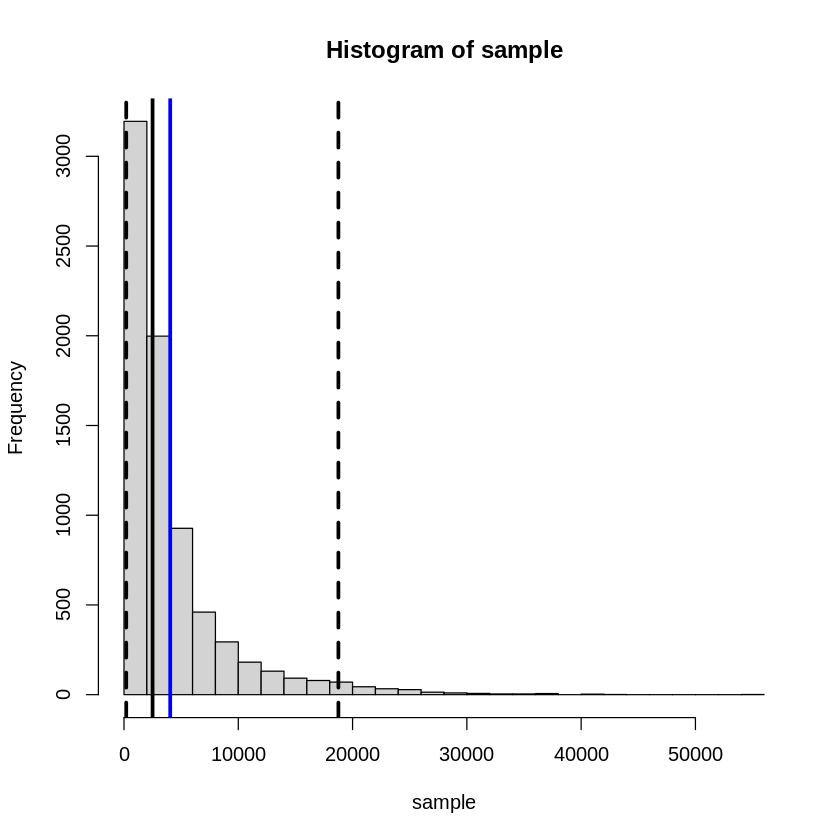

In [ ]:

hist_plot(df_HMO_data$cost)

The blue line indicates the population median of cost at 2500.

The black solid line indicates the population mean of cost at 4043.

The dashed black line indicate the min and max quantile range

In [ ]:
# Checking for NAs

check_NA <- function(df){
  for (col in colnames(df)){
    print(paste(col,':', nrow(df[is.na(df[col]),])))
    # print(df[is.na(df[col]),])
  }
}

check_NA(df_HMO_data)

# df[is.na(df$LAPOP1_10),]

[1] "X : 0"
[1] "age : 0"
[1] "bmi : 78"
[1] "children : 0"
[1] "smoker : 0"
[1] "location : 0"
[1] "location_type : 0"
[1] "education_level : 0"
[1] "yearly_physical : 0"
[1] "exercise : 0"
[1] "married : 0"
[1] "hypertension : 80"
[1] "gender : 0"
[1] "cost : 0"


In [ ]:
#count of total NA values
nrow(df_HMO_data[((is.na(df_HMO_data$bmi)) | (is.na(df_HMO_data$hypertension))),])

[1] 158

> There are 78 NA in "bmi" and 80 NA in "hypertension"

> These NA in different collumns do not overlap

> For "bmi", we can perform mean value imutation
> for "hypertension", we can set it to 0

we decided to use the mean interpolation method to fix the nas in the both columns.

In [ ]:
# Checking BMI Distribution across location
df_HMO_data %>% filter(!is.na(bmi)) %>% group_by(location) %>% summarise(bmi =mean(bmi))

location,bmi
<fct>,<dbl>
CONNECTICUT,30.55791
MARYLAND,30.67990
MASSACHUSETTS,30.64881
NEW JERSEY,30.59453
NEW YORK,30.92448
PENNSYLVANIA,30.89284
RHODE ISLAND,30.70580


> BMI of states are similar so we can apply a overall mean imputation

In [ ]:
# Checking BMI Distribution across smokers
df_HMO_data %>% filter(!is.na(bmi)) %>% group_by(smoker) %>% summarise(bmi =mean(bmi))

smoker,bmi
<fct>,<dbl>
no,30.79102
yes,30.81239


In [ ]:
# Checking BMI Distribution across smokers
df_HMO_data %>% filter(!is.na(bmi)) %>% group_by(smoker) %>% summarise(bmi =mean(bmi))

children,bmi
<int>,<dbl>
0,30.65592
1,31.15520
2,30.68532
3,31.09279
4,30.94867
5,27.75536


> We will be applying BMI imputation on overall mean

In [ ]:
# BMI Imputation
df_HMO_data$bmi <- na_interpolation(df_HMO_data$bmi)
# df_HMO_data$hypertension <- na_interpolation(df_HMO_data$hypertension)

# Null hypertension set to 0
df_HMO_data["hypertension"][is.na(df_HMO_data["hypertension"])] <- 0

In [ ]:
#data overview of 10 rows
head(df_HMO_data,10)

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost
,<int>,<int>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>
1,1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,1746
2,2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,602
3,3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,576
4,4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,5562
5,5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,836
6,7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,3842
7,9,36,29.830,2,no,PENNSYLVANIA,Urban,Bachelor,No,Active,Married,0,male,1304
8,10,59,25.840,0,no,PENNSYLVANIA,Country,Bachelor,No,Not-Active,Married,1,female,9724
9,11,24,26.220,0,no,PENNSYLVANIA,Urban,Bachelor,No,Active,Married,0,male,201


---
---

# Data Categorization

## Cost Category
Expensive or not expensive based on cost median

In [ ]:
# Threshold
val_threshold <- median(df_HMO_data$cost)

cost_cat <- function(x){
  r <- case_when((is.na(x)) ~'NA'
    , (val_threshold < x) ~ 'Expensive'
    , (val_threshold >= x) ~ 'Inexpensive')
  return(r)
}

---

## Age Category
0 - 12: Child\
13 - 19: Teen\
20 - 30: Young Adult\
30 - 50: Adult\
50 - 70: Older Adult\
70+ : Senior citizen

In [ ]:
age_cat <- function(x){
  r <- case_when((is.na(x)) ~'NA'
    , x < 13 ~ 'Child'
    , (x >= 13 & x < 20) ~ 'Teen'
    , (x >= 20 & x < 30) ~ 'Young Adult'
    , (x >= 30 & x < 50) ~ 'Adult'
    , (x >= 50 & x < 70) ~ 'Older Adult'
    , (x >= 70) ~ 'Senior citizen')
  return(r)
}

---

## BMI Category

If your BMI is less than 18.5, it falls within the underweight range.\
If your BMI is 18.5 to <25, it falls within the healthy weight range.\
If your BMI is 25.0 to <30, it falls within the overweight range.\
If your BMI is 30.0 or higher, it falls within the obesity range.\

In [ ]:
bmi_cat <- function(x){
  r <- case_when((is.na(x)) ~'NA'
    , x < 18.5 ~ 'Underweight'
    , (x >= 18.5 & x < 25.0) ~ 'Healthy'
    , (x >= 25.0 & x < 30.0) ~ 'Overweight'
    , (x >= 30.0) ~ 'Obese')
  return(r)
}

---

## Children Category
'> 2 Children: more than 2\
'< 2 Children: less than 2\
'= 0 Children: no children 

In [ ]:
#statistical information
summary(df_HMO_data$children)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.109   2.000   5.000 

In [ ]:
child_cat <- function(x){
  r <- case_when((is.na(x)) ~ 'NA'
    , (x == 0) ~ 'no children'
    , (x > 0 & x <=2) ~ '2 or less'
    , (x > 2) ~ 'more than 2')
  return(r)
}

In [ ]:
# testing
child_cat(4)

[1] "more than 2"

---

## Applying Categories

In [ ]:
# Cost Category
df_HMO_data <- df_HMO_data %>% mutate(cost_category = as.factor(cost_cat(cost)))

# Age Category
df_HMO_data <- df_HMO_data %>% mutate(age_category = as.factor(age_cat(age)))

# BMI Category
df_HMO_data <- df_HMO_data %>% mutate(bmi_category = as.factor(bmi_cat(bmi)))

# Child Category
df_HMO_data <- df_HMO_data %>% mutate(child_category = as.factor(child_cat(children)))

In [ ]:
# Function to label class
class_label_gen <- function(data, num_bins){
  num_bins = num_bins-1
  # calculate the bin width
  bin_width <- ceiling((max(data) - min(data)) / num_bins)

  # create the bin labels
  bin_labels <- paste0(min(data) + (0:num_bins) * bin_width, "-", min(data) + (1:num_bins) * bin_width - 1)
  # bin_labels <- min(data) + (0:num_bins) * bin_width

  return(bin_labels)
}

In [ ]:
# Cost Class range
#creating new column segregating cost in classes
break_n = 10
df_HMO_data$cost_class <- cut(df_HMO_data$cost, breaks = break_n, labels = class_label_gen(df_HMO_data$cost,break_n))


In [ ]:
#overview of top 6 rows
head(df_HMO_data)

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost,cost_category,age_category,bmi_category,child_category,cost_class
,<int>,<int>,<dbl>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,1746,Inexpensive,Teen,Overweight,no children,2-6192
2,2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,602,Inexpensive,Teen,Obese,2 or less,2-6192
3,3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,576,Inexpensive,Young Adult,Obese,more than 2,2-6192
4,4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,5562,Expensive,Adult,Healthy,no children,2-6192
5,5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,836,Inexpensive,Adult,Overweight,no children,2-6192
6,7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,3842,Expensive,Adult,Obese,2 or less,2-6192


In [ ]:
#metadata
str(df_HMO_data)

'data.frame':	7582 obs. of  19 variables:
 $ X              : int  1 2 3 4 5 7 9 10 11 12 ...
 $ age            : int  18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num  27.9 33.8 33 22.7 28.9 ...
 $ children       : int  0 1 3 0 0 1 2 0 0 0 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 2 ...
 $ location       : chr  "CONNECTICUT" "RHODE ISLAND" "MASSACHUSETTS" "PENNSYLVANIA" ...
 $ location_type  : Factor w/ 2 levels "Country","Urban": 2 2 2 1 1 2 2 1 2 2 ...
 $ education_level: Factor w/ 4 levels "Bachelor","Master",..: 1 1 2 2 4 1 1 1 1 3 ...
 $ yearly_physical: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ exercise       : Factor w/ 2 levels "Active","Not-Active": 1 2 1 2 2 2 1 2 1 1 ...
 $ married        : Factor w/ 2 levels "Married","Not_Married": 1 1 1 1 1 1 1 1 1 1 ...
 $ hypertension   : num  0 0 0 1 0 0 0 1 0 0 ...
 $ gender         : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 2 1 2 1 ...
 $ cost           : int  1746 602 5

---
---

### Making deciles cateogroies

In [ ]:
# Calculting deciles
# deciling patients based on cost
df_HMO_data$cost_decile <- as.factor(ntile(-df_HMO_data$cost, 10))#, weights = df_HMO_data$cost))

In [ ]:
#overview of top 6 rows
head(df_HMO_data)

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost,cost_category,age_category,bmi_category,child_category,cost_class,cost_decile
,<int>,<int>,<dbl>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,1746,Inexpensive,Teen,Overweight,no children,2-6192,7
2,2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,602,Inexpensive,Teen,Obese,2 or less,2-6192,9
3,3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,576,Inexpensive,Young Adult,Obese,more than 2,2-6192,9
4,4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,5562,Expensive,Adult,Healthy,no children,2-6192,3
5,5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,836,Inexpensive,Adult,Overweight,no children,2-6192,8
6,7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,3842,Expensive,Adult,Obese,2 or less,2-6192,4


In [ ]:
# Decile stats
df_top_spenders <- df_HMO_data %>%  group_by(cost_decile) %>% 
  summarise(count = n_distinct(X), avg_cost =mean(cost), sum_cost = sum(cost)) %>% 
    summarise(cost_decile, count, avg_cost, sum_cost
    , cum_sum_cost = cumsum(sum_cost)
    , patient_perc = round(100*cumsum(count)/sum(count),2)
    , cost_perc = round(100*cumsum(sum_cost)/sum(sum_cost),2))

df_top_spenders

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


cost_decile,count,avg_cost,sum_cost,cum_sum_cost,patient_perc,cost_perc
<fct>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,759,16085.6653,12209020,12209020,10.01,39.83
2,759,7411.7194,5625495,17834515,20.02,58.18
3,758,4856.0369,3680876,21515391,30.02,70.19
4,758,3668.7084,2780881,24296272,40.02,79.26
5,758,2862.6755,2169908,26466180,50.01,86.34
6,758,2180.5198,1652834,28119014,60.01,91.73
7,758,1547.9644,1173357,29292371,70.01,95.56
8,758,973.6913,738058,30030429,80.01,97.97
9,758,557.7124,422746,30453175,90.00,99.35


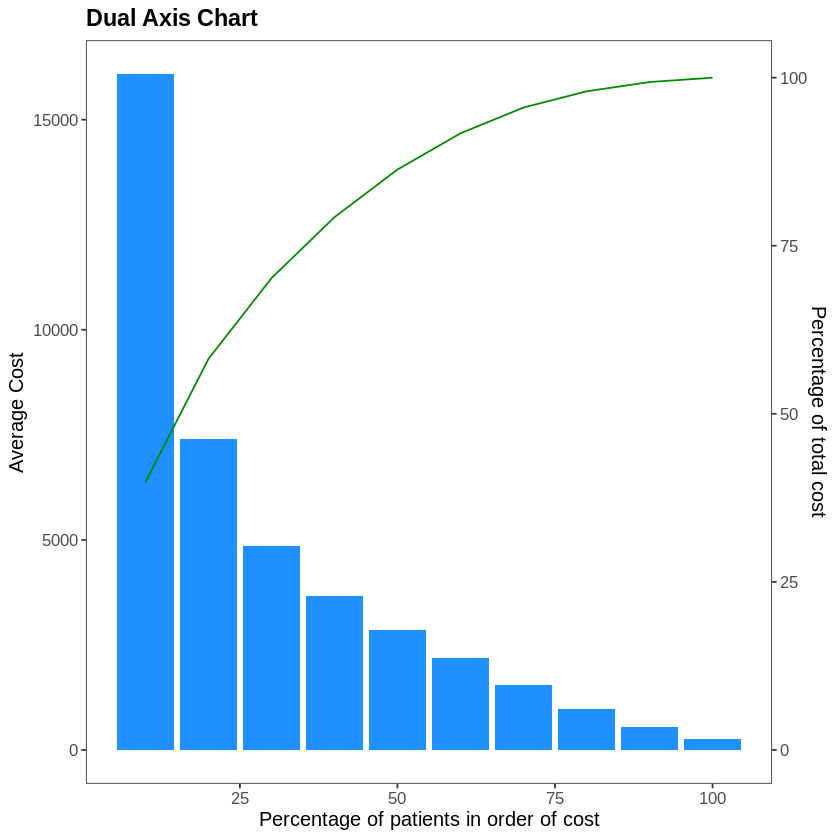

In [ ]:

# Create the plot
my_plot <- ggplot(df_top_spenders, aes(x = patient_perc))


# Add the second y-axis (left)
my_plot <- my_plot + geom_bar(aes(y = avg_cost), stat = "identity", fill = "dodgerblue")


# Add the first y-axis (right)
my_plot <- my_plot + geom_line(aes(y = cost_perc*160), color = "green4")

my_plot <- my_plot + scale_y_continuous(
  name = "Average Cost",
  sec.axis = sec_axis(~ ./160, name = "Percentage of total cost")
)

# Add labels and titles
my_plot <- my_plot + labs(x = "Percentage of patients in order of cost", y = "Percentage of total cost and Average Cost")
my_plot <- my_plot + ggtitle("Dual Axis Chart")

# Customize the theme
my_plot <- my_plot + theme_bw() + theme(
  plot.title = element_text(size = 14, face = "bold"),
  axis.title.x = element_text(size = 12),
  axis.title.y = element_text(size = 12),
  axis.text = element_text(size = 10),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  legend.position = "none"
)

# Display the plot
my_plot

>The table summarizes the patient count, average cost, total cost, cumulative total cost, percentage of patients, and percentage of costs for each cost decile.

> 10% of the top paying patients contribute to approx 40% of the overall cost.

> 40% of the top paying patients contribute to approx 60% of the overall cost

The green line indicates the bin percentage out of the total percentage. It eventually goes to 100 as the bins increase.

The blue bars represent each decile's cost value. 


In [ ]:
#data overview 
head(df_HMO_data)

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost,cost_category,age_category,bmi_category,child_category,cost_class,cost_decile
,<int>,<int>,<dbl>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,1746,Inexpensive,Teen,Overweight,no children,2-6192,7
2,2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,602,Inexpensive,Teen,Obese,2 or less,2-6192,9
3,3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,576,Inexpensive,Young Adult,Obese,more than 2,2-6192,9
4,4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,5562,Expensive,Adult,Healthy,no children,2-6192,3
5,5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,836,Inexpensive,Adult,Overweight,no children,2-6192,8
6,7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,3842,Expensive,Adult,Obese,2 or less,2-6192,4


In [ ]:
#statistical information for top 2 cost_deciles
summary(df_HMO_data[which(df_HMO_data$cost_decile %in% c('1', '2')),])

       X                  age             bmi           children     smoker   
 Min.   :       10   Min.   :18.00   Min.   :17.77   Min.   :0.000   no :528  
 1st Qu.:     5405   1st Qu.:36.00   1st Qu.:29.83   1st Qu.:0.000   yes:990  
 Median :    22826   Median :47.00   Median :33.33   Median :1.000            
 Mean   :   838977   Mean   :45.11   Mean   :33.10   Mean   :1.227            
 3rd Qu.:   115611   3rd Qu.:57.00   3rd Qu.:36.77   3rd Qu.:2.000            
 Max.   :114211111   Max.   :66.00   Max.   :52.58   Max.   :5.000            
                                                                              
   location         location_type           education_level yearly_physical
 Length:1518        Country: 386   Bachelor         :907    No :1123       
 Class :character   Urban  :1132   Master           :291    Yes: 395       
 Mode  :character                  No College Degree:166                   
                                   PhD              :154        

> Most of the high payers are **obese** and of age category of **adult** and **older adult**.



---
---

# Plots

## Histograms

Plot: Cost Histogram

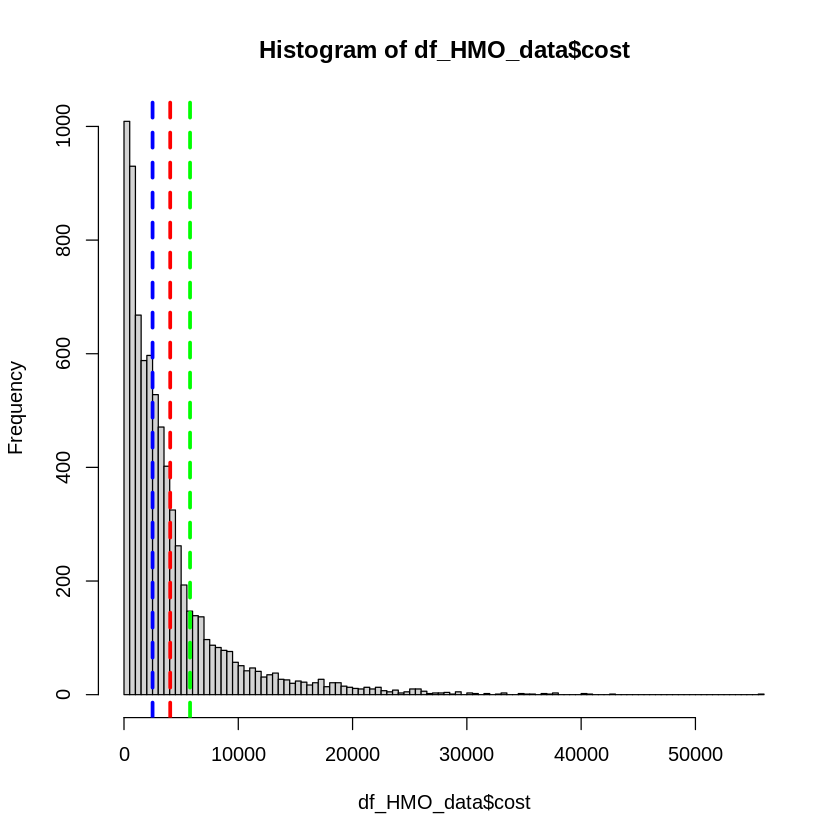

In [ ]:
# Histogram of cost distibution
hist(df_HMO_data$cost, breaks = 100)#, xlim = c(0,10000))
#abline for mean
abline(v=mean(df_HMO_data$cost), col='red', lwd=3, lty='dashed')
#abline for median
abline(v=median(df_HMO_data$cost), col='blue', lwd=3, lty='dashed')
#abline showing 80th percentile
abline(v=quantile(df_HMO_data$cost, c(.8)), col='Green', lwd=3, lty='dashed')

The cost is right skewed indicating majority of the cost is concentrated in the first few deciles of the population.

---

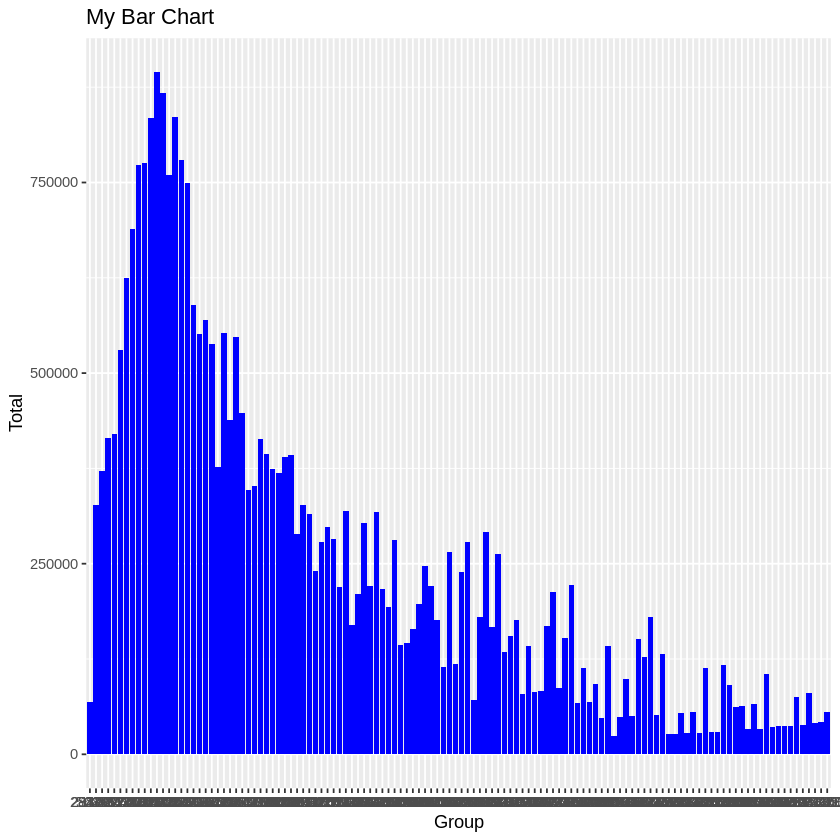

In [ ]:
n = 200

#create visualization of the distribution of costs across different categories,
df_HMO_data$cost_categories <- cut(df_HMO_data$cost, breaks = n, labels = class_label_gen(df_HMO_data$cost,n))

freq_table <- df_HMO_data %>% group_by(cost_categories) %>% summarise(cost = sum(cost))

# create a bar chart of the frequency table
ggplot(freq_table, aes(x = cost_categories, y = cost)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "My Bar Chart", x = "Group", y = "Total")

In [ ]:
#cost distrubution for maximum cost 
freq_table[which.max(freq_table$cost),]

cost_categories,cost
<fct>,<int>
3082-3361,894432


---

Histogram of BMI Distribution

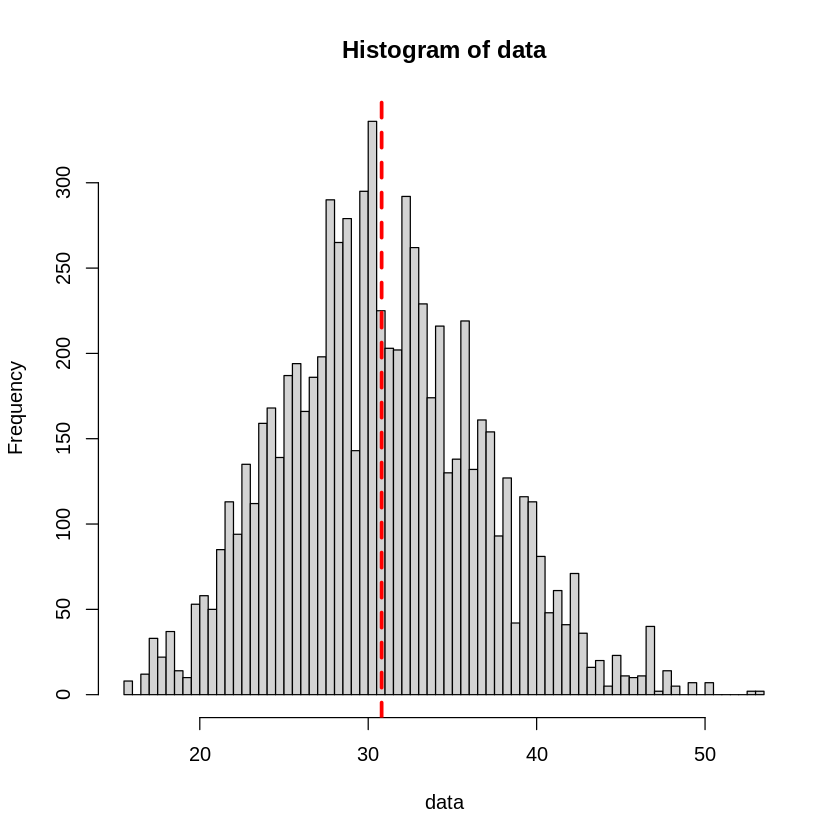

In [ ]:
# BMI

data = df_HMO_data$bmi
hist(data, breaks = 100)
abline(v=mean(data), col='red', lwd=3, lty='dashed')


Red line indicating the mean of the bmi

---

Histogram: children

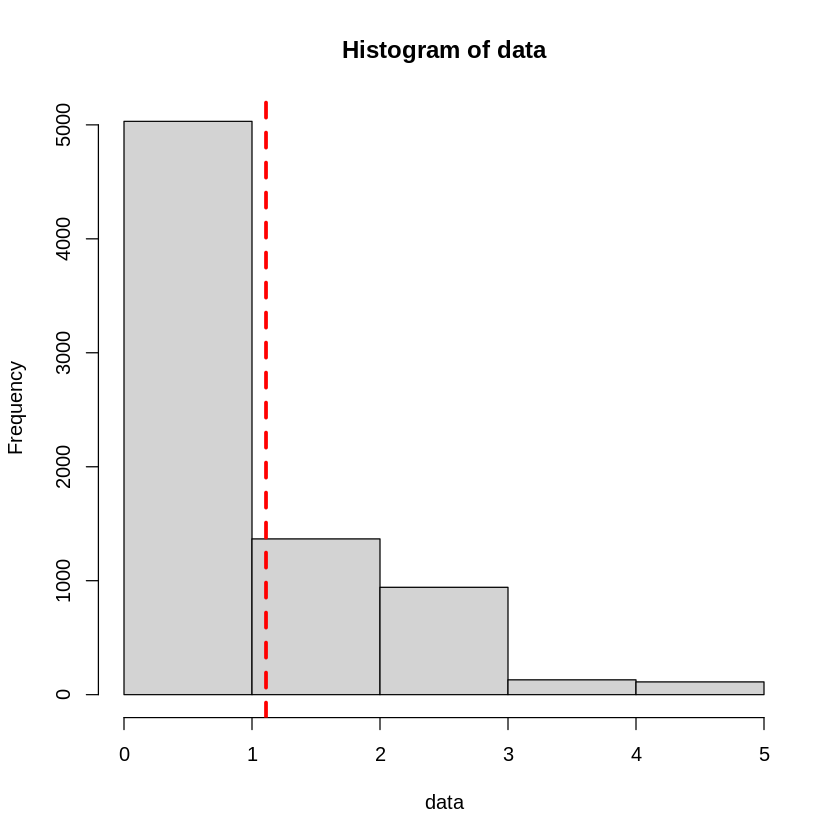

In [ ]:
# Children

data = df_HMO_data$children
hist(data, breaks = 6)
abline(v=mean(data), col='red', lwd=3, lty='dashed')

---

Red line indicating the mean of the no. of children

Histogram: Age

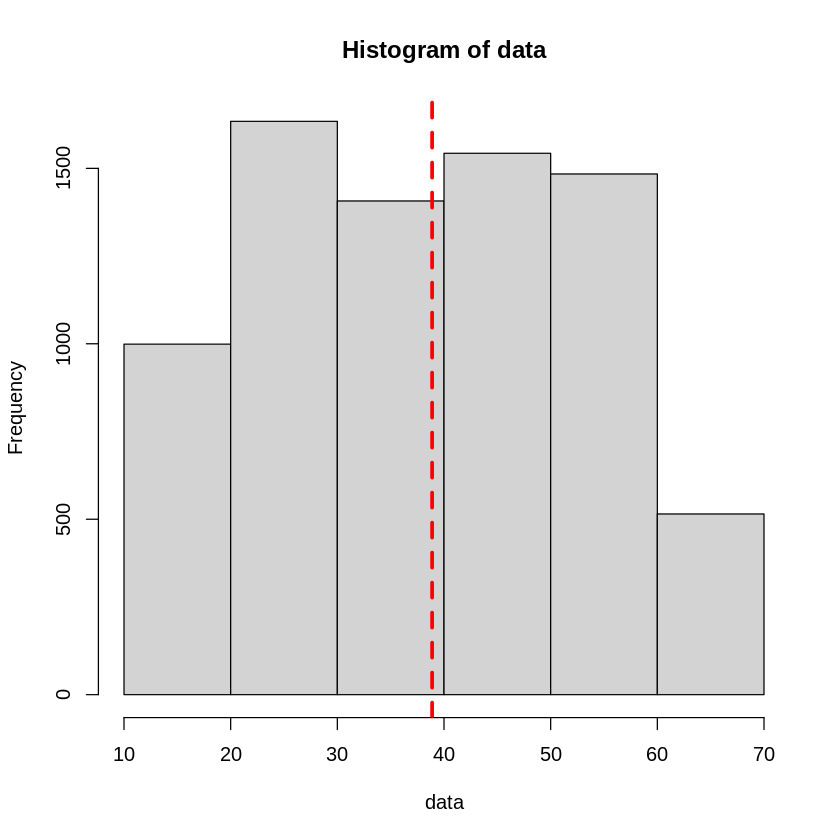

In [ ]:
# Age

data = df_HMO_data$age
hist(data, breaks = 6)
abline(v=mean(data), col='red', lwd=3, lty='dashed')

---

Red line indicating the mean of the age

In [ ]:
#metadata
str(df_HMO_data)

'data.frame':	7582 obs. of  21 variables:
 $ X              : int  1 2 3 4 5 7 9 10 11 12 ...
 $ age            : int  18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num  27.9 33.8 33 22.7 28.9 ...
 $ children       : int  0 1 3 0 0 1 2 0 0 0 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 2 ...
 $ location       : chr  "CONNECTICUT" "RHODE ISLAND" "MASSACHUSETTS" "PENNSYLVANIA" ...
 $ location_type  : Factor w/ 2 levels "Country","Urban": 2 2 2 1 1 2 2 1 2 2 ...
 $ education_level: Factor w/ 4 levels "Bachelor","Master",..: 1 1 2 2 4 1 1 1 1 3 ...
 $ yearly_physical: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ exercise       : Factor w/ 2 levels "Active","Not-Active": 1 2 1 2 2 2 1 2 1 1 ...
 $ married        : Factor w/ 2 levels "Married","Not_Married": 1 1 1 1 1 1 1 1 1 1 ...
 $ hypertension   : num  0 0 0 1 0 0 0 1 0 0 ...
 $ gender         : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 2 1 2 1 ...
 $ cost           : int  1746 602 5

---

## Scatter plots

Scatter plot of BMI and Cost

`geom_smooth()` using formula = 'y ~ x'


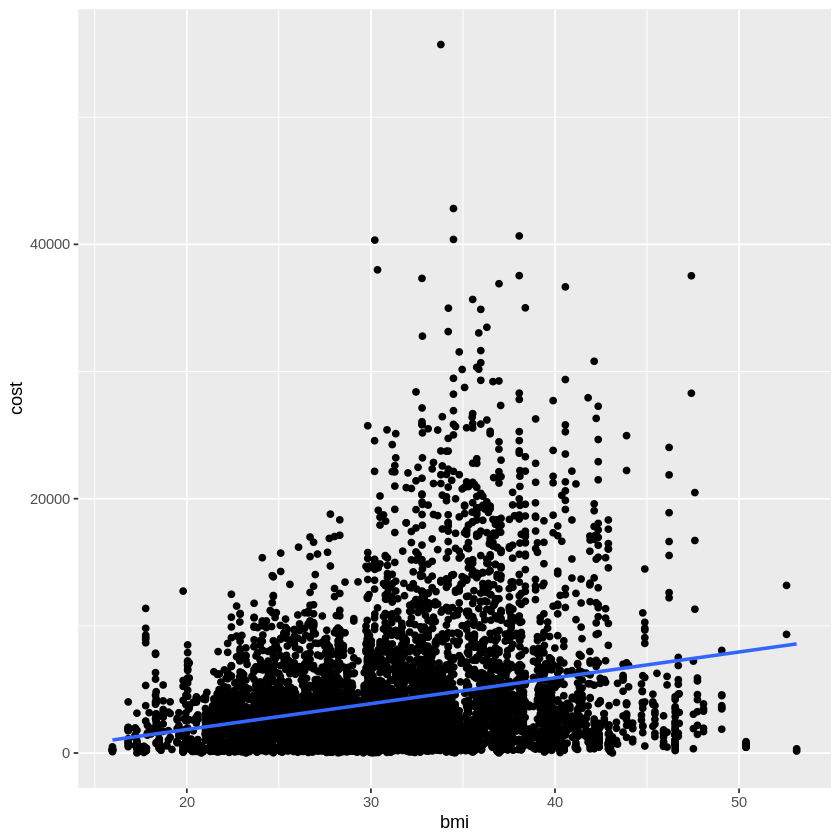

In [ ]:
# BMI
ggplot(data=df_HMO_data) + aes(x=bmi, y=cost) + geom_point() +
 geom_smooth(method="lm", se=FALSE)
#line fitting the linear equation

`geom_smooth()` using formula = 'y ~ x'


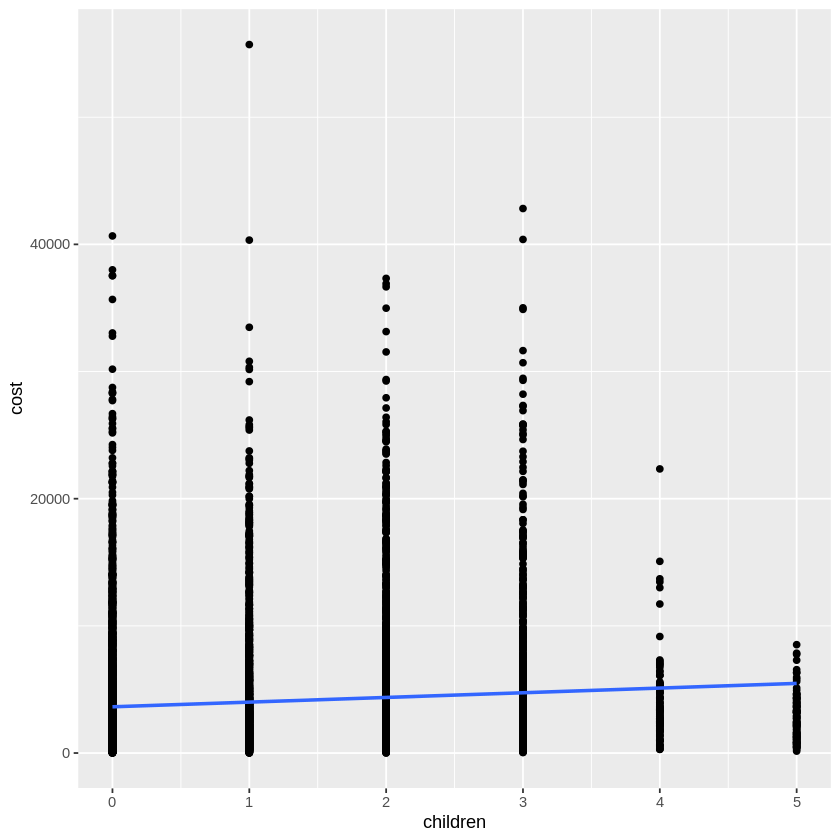

In [ ]:
# AGE
ggplot(data=df_HMO_data) + aes(x=children, y=cost) + geom_point() +
 geom_smooth(method="lm", se=FALSE)
#line fitting the linear equation

`geom_smooth()` using formula = 'y ~ x'


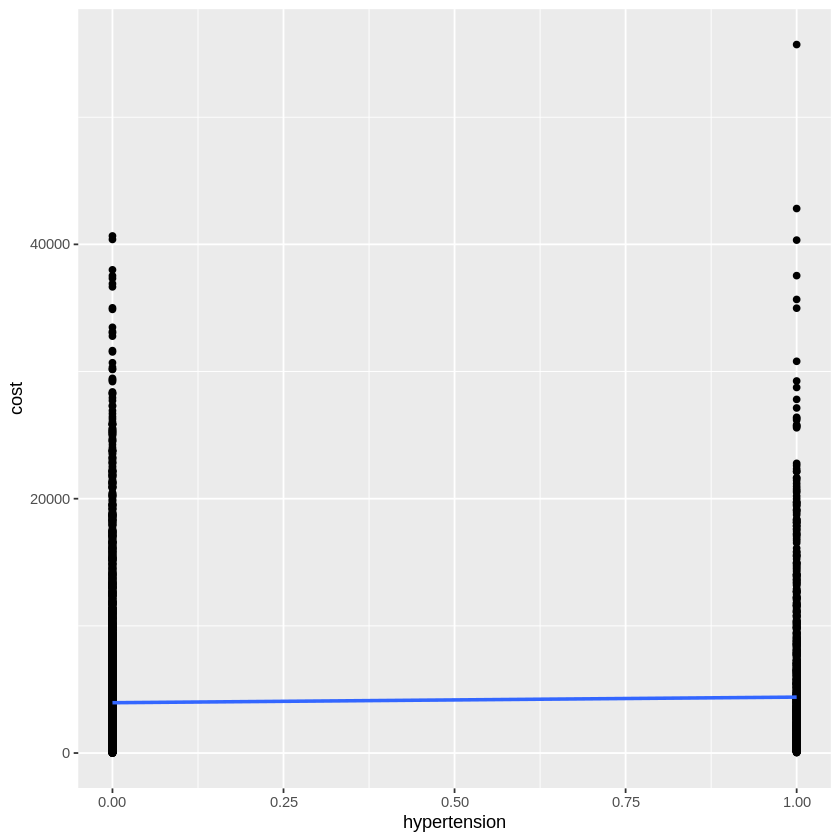

In [ ]:
# hypertension
ggplot(data=df_HMO_data) + aes(x=hypertension, y=cost) + geom_point() +
 geom_smooth(method="lm", se=FALSE)
#line fitting the linear equation

`geom_smooth()` using formula = 'y ~ x'


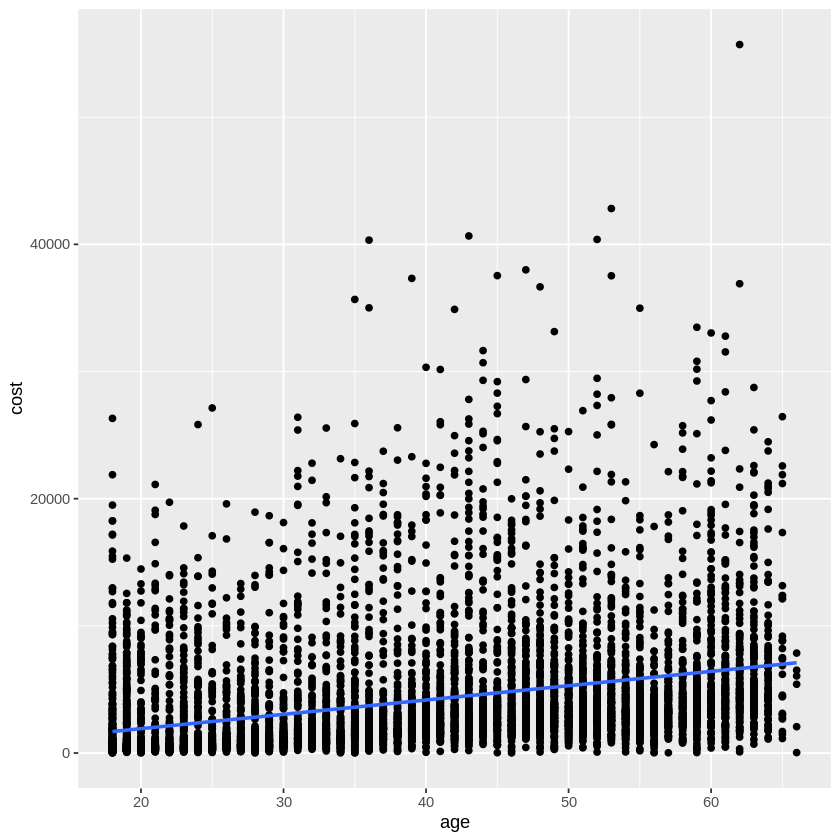

In [ ]:
# Children
ggplot(data=df_HMO_data) + aes(x=age, y=cost) + geom_point() +
 geom_smooth(method="lm", se=FALSE)
#line fitting the linear equation

Plot: GGmap location and Cost

In [ ]:
EnsurePackage('ggplot2')
EnsurePackage('maps')
EnsurePackage('mapproj')
EnsurePackage('ggmap')
EnsurePackage('tidyverse')

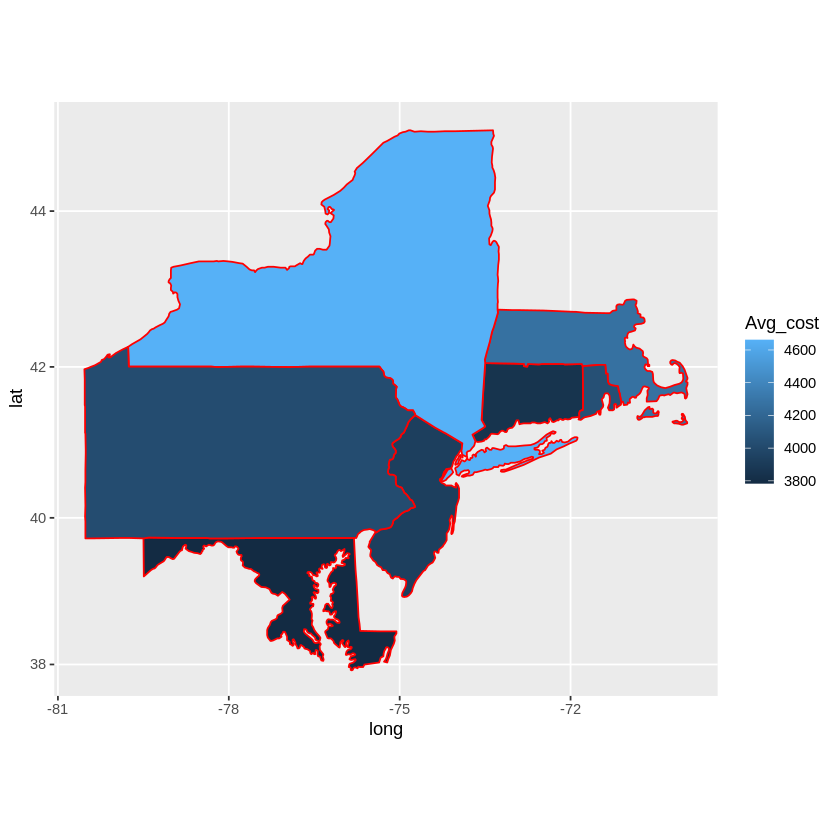

In [ ]:
#map plot for location and average cost data
GroupedData <- df_HMO_data%>%group_by(location)%>%summarise(Avg_cost =mean(cost))
state <- map_data("state")
# colnames(GroupedData)[6]<- "region"
GroupedData$region <- GroupedData$location
GroupedData$region <- tolower(GroupedData$region)
MergedData <- merge(state,GroupedData, on="region")
MergedData <- MergedData%>%arrange(order)
#To create a filled map
MyMap <- ggplot(MergedData)+coord_map()+geom_polygon(aes(x=long,y=lat,group=group, fill=Avg_cost), color="red")
MyMap

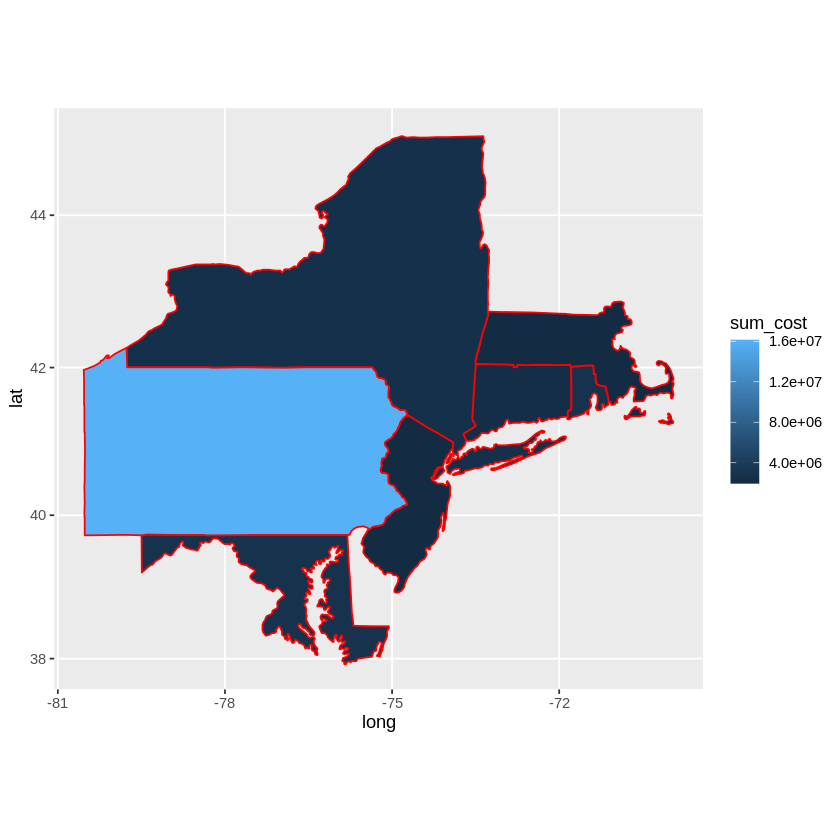

In [ ]:
#map plot for location and total cost data
GroupedData <- df_HMO_data%>%group_by(location)%>%summarise(sum_cost =sum(cost))
state <- map_data("state")
# colnames(GroupedData)[6]<- "region"
GroupedData$region <- GroupedData$location
GroupedData$region <- tolower(GroupedData$region)
MergedData <- merge(state,GroupedData, on="region")
MergedData <- MergedData%>%arrange(order)
#To create a filled map
MyMap <- ggplot(MergedData)+coord_map()+geom_polygon(aes(x=long,y=lat,group=group, fill=sum_cost), color="red")
MyMap

Plot: 

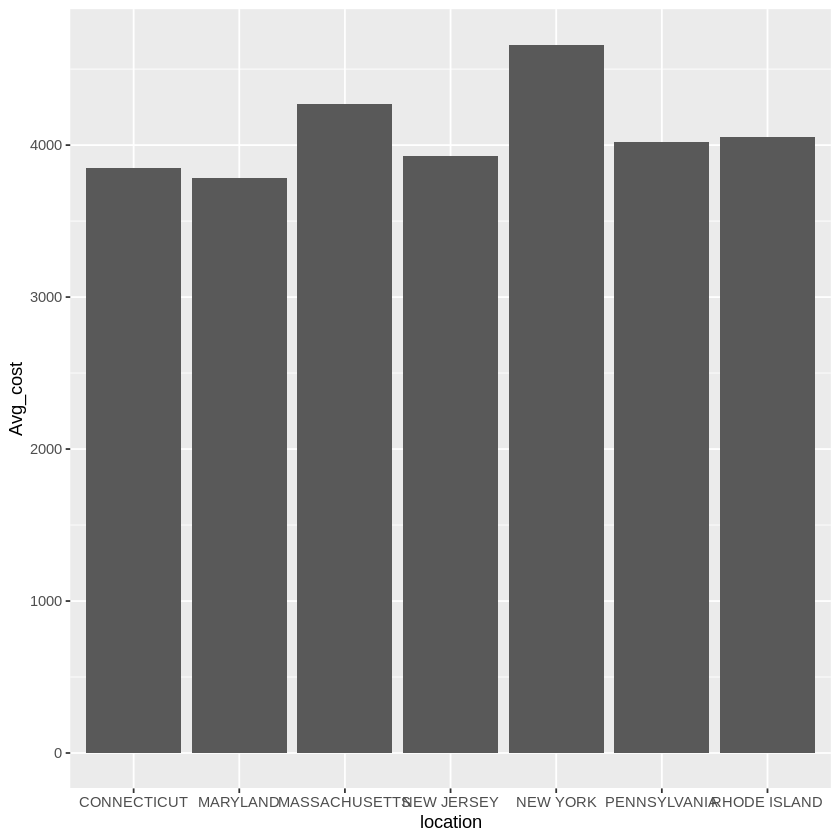

In [ ]:
#Location and average cost
GroupedData <- df_HMO_data%>%group_by(location)%>%summarise(Avg_cost =mean(cost))

ggplot(data=GroupedData, aes(x=location, y=Avg_cost)) + geom_bar(stat="identity")



In [ ]:
#metadata
str(df_HMO_data)

'data.frame':	7582 obs. of  21 variables:
 $ X              : int  1 2 3 4 5 7 9 10 11 12 ...
 $ age            : int  18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num  27.9 33.8 33 22.7 28.9 ...
 $ children       : int  0 1 3 0 0 1 2 0 0 0 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 2 ...
 $ location       : chr  "CONNECTICUT" "RHODE ISLAND" "MASSACHUSETTS" "PENNSYLVANIA" ...
 $ location_type  : Factor w/ 2 levels "Country","Urban": 2 2 2 1 1 2 2 1 2 2 ...
 $ education_level: Factor w/ 4 levels "Bachelor","Master",..: 1 1 2 2 4 1 1 1 1 3 ...
 $ yearly_physical: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ exercise       : Factor w/ 2 levels "Active","Not-Active": 1 2 1 2 2 2 1 2 1 1 ...
 $ married        : Factor w/ 2 levels "Married","Not_Married": 1 1 1 1 1 1 1 1 1 1 ...
 $ hypertension   : num  0 0 0 1 0 0 0 1 0 0 ...
 $ gender         : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 2 1 2 1 ...
 $ cost           : int  1746 602 5

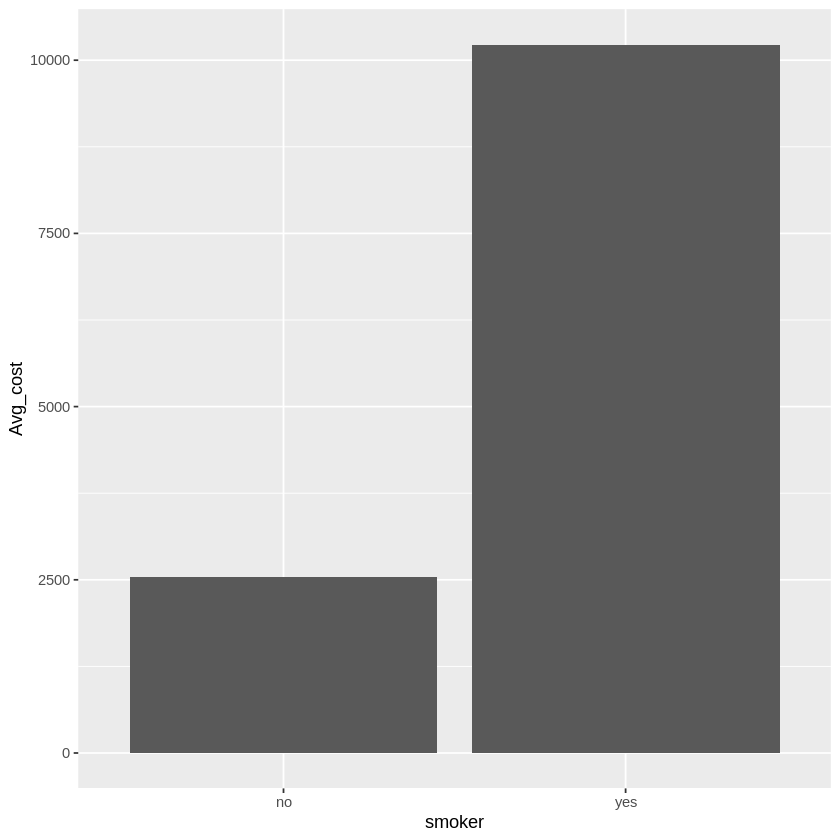

In [ ]:
#smoker and average cost
GroupedData1 <- df_HMO_data%>%group_by(smoker)%>%summarise(Avg_cost =mean(cost))

ggplot(data=GroupedData1, aes(x=smoker, y=Avg_cost)) + geom_bar(stat="identity")



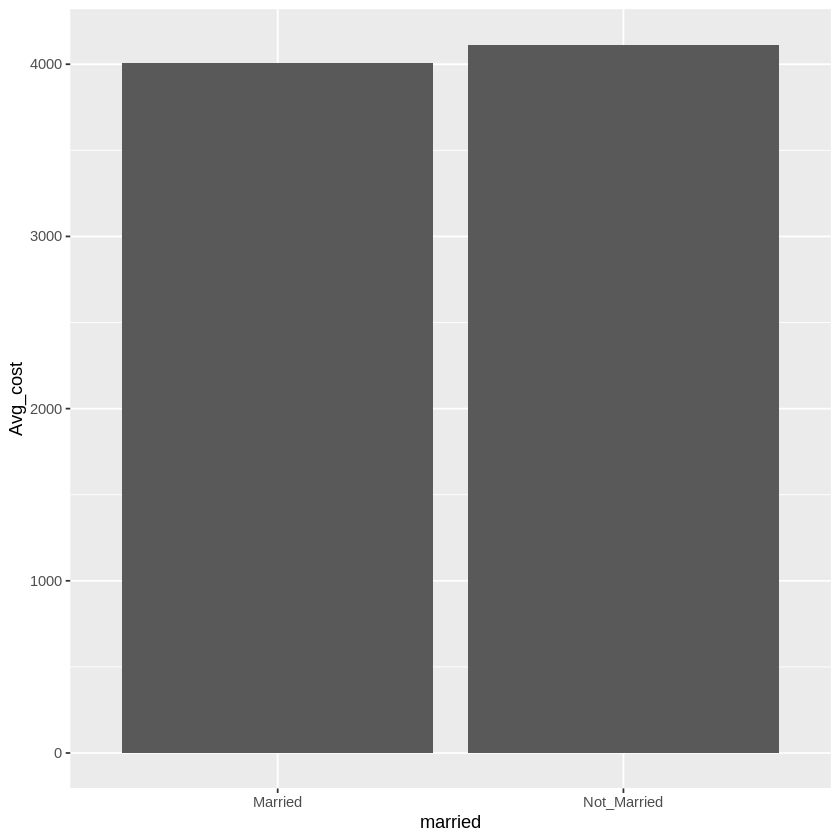

In [ ]:
#Marital Status and Average Cost
GroupedData2 <- df_HMO_data%>%group_by(married)%>%summarise(Avg_cost =mean(cost))

ggplot(data=GroupedData2, aes(x=married, y=Avg_cost)) + geom_bar(stat="identity")



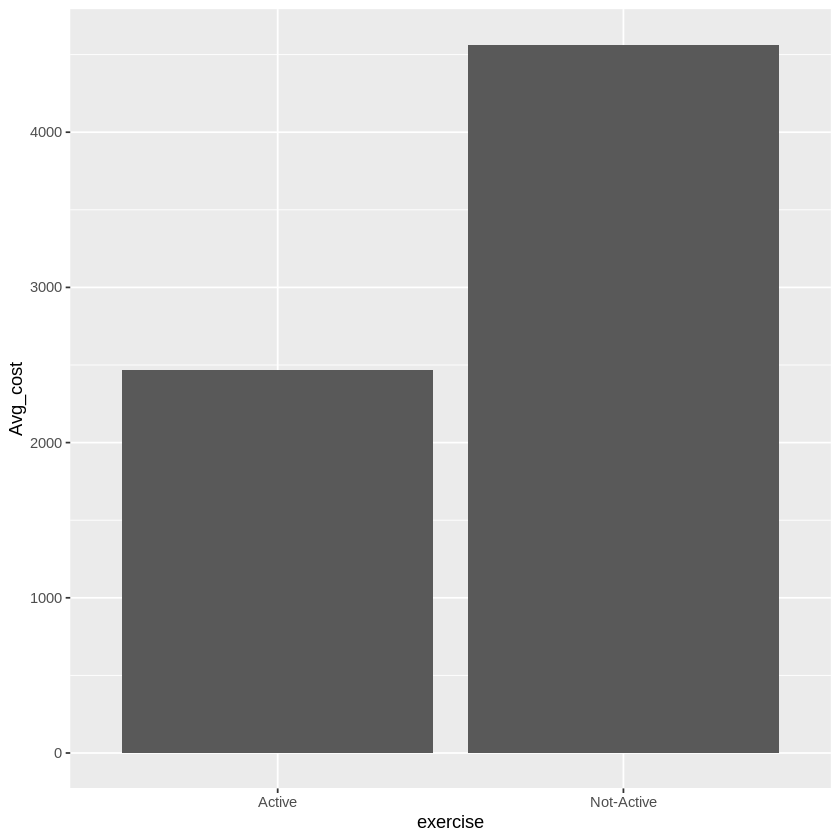

In [ ]:
#Exercise and Average Cost
GroupedData3 <- df_HMO_data%>%group_by(exercise)%>%summarise(Avg_cost =mean(cost))

ggplot(data=GroupedData3, aes(x=exercise, y=Avg_cost)) + geom_bar(stat="identity")



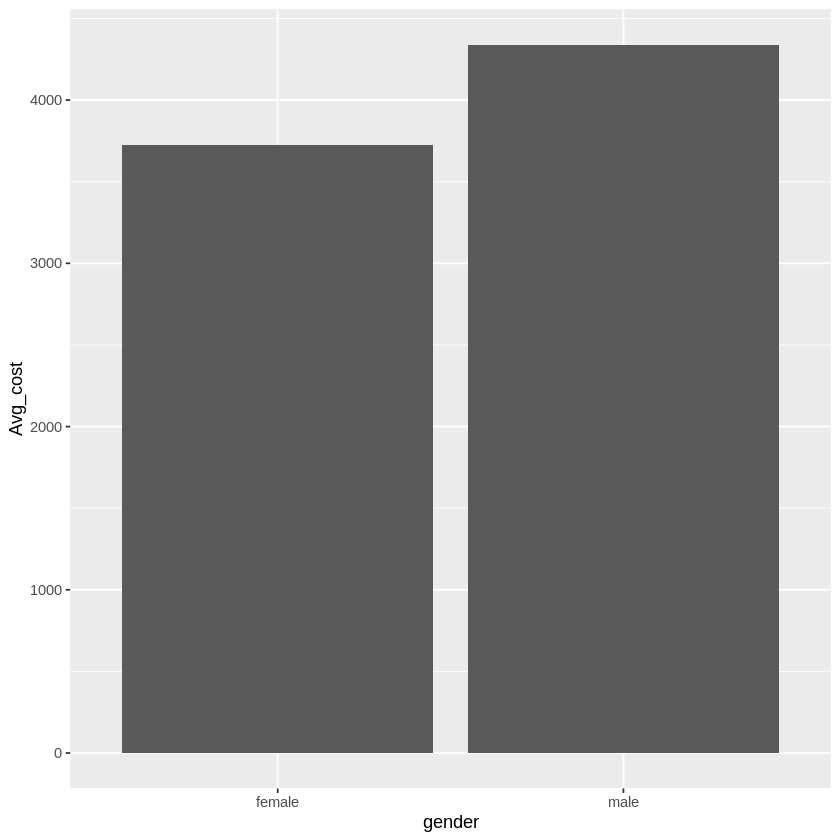

In [ ]:
#Gender and Average Cost
GroupedData4 <- df_HMO_data%>%group_by(gender)%>%summarise(Avg_cost =mean(cost))

ggplot(data=GroupedData4, aes(x=gender, y=Avg_cost)) + geom_bar(stat="identity")


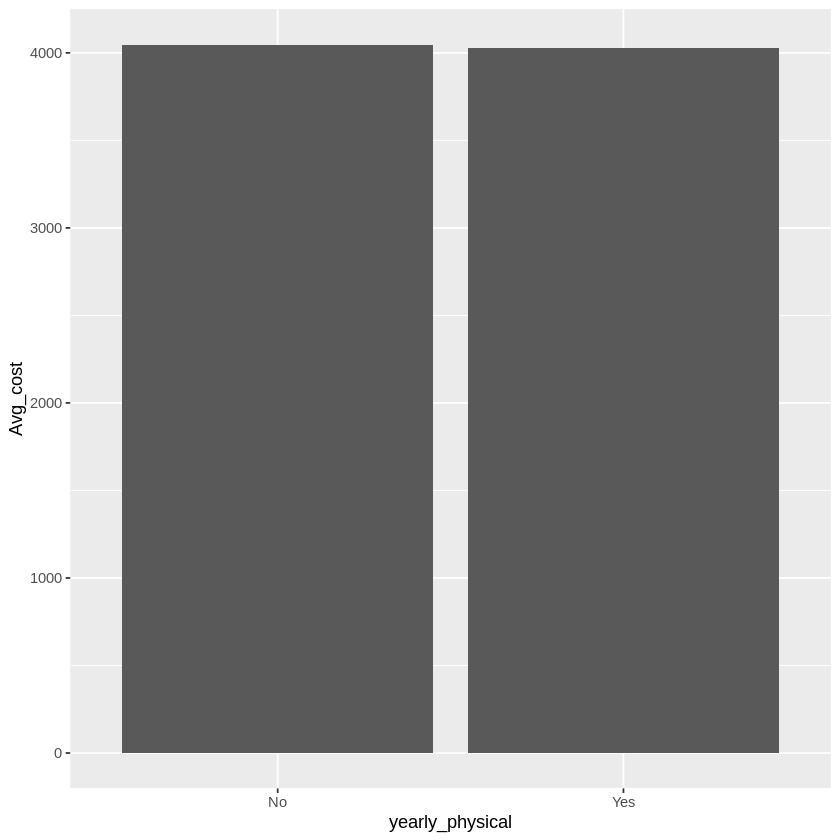

In [ ]:
# yearly_physical and average cost

GroupedData4 <- df_HMO_data%>%group_by(yearly_physical)%>%summarise(Avg_cost =mean(cost))

ggplot(data=GroupedData4, aes(x=yearly_physical, y=Avg_cost)) + geom_bar(stat="identity")



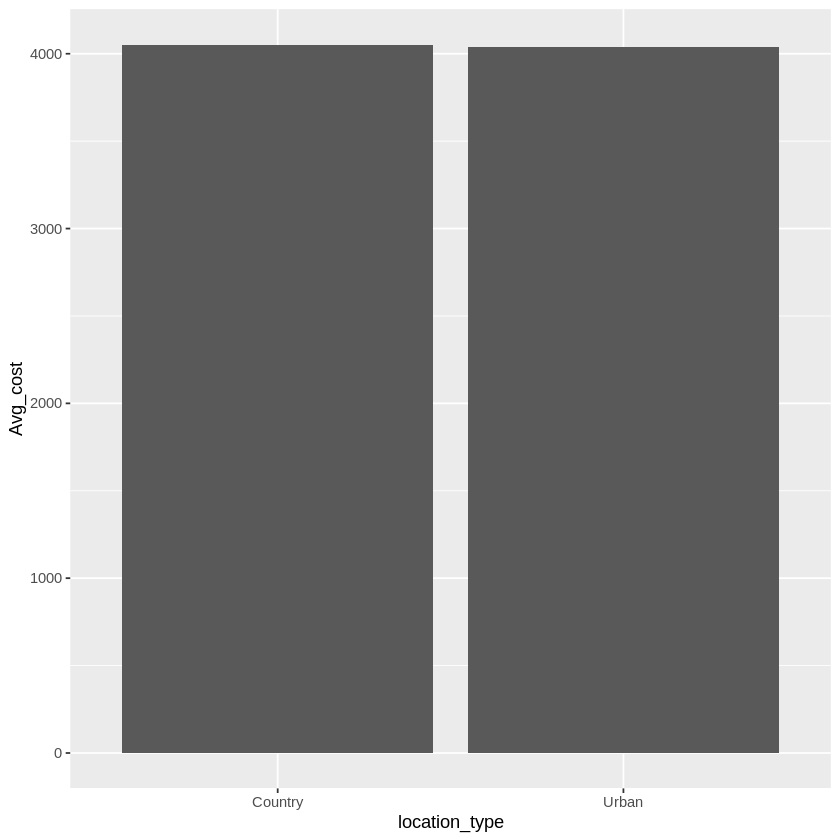

In [ ]:
# location_type

GroupedData4 <- df_HMO_data%>%group_by(location_type)%>%summarise(Avg_cost =mean(cost))

ggplot(data=GroupedData4, aes(x=location_type, y=Avg_cost)) + geom_bar(stat="identity")



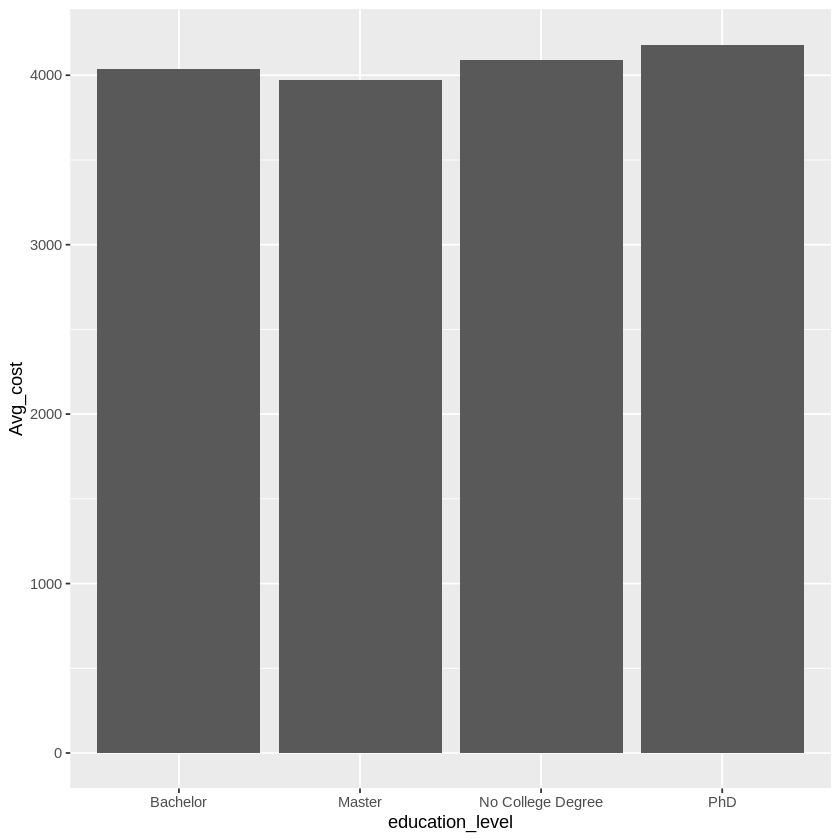

In [ ]:
# education_level and average cost
GroupedData5 <- df_HMO_data%>%group_by(education_level)%>%summarise(Avg_cost =mean(cost))

ggplot(data=GroupedData5, aes(x=education_level, y=Avg_cost)) + geom_bar(stat="identity")




Linear models to check correlation:

A simple corr() cannot account for casual relationship, thus using other models

In [ ]:
#predictor is bmi
lm_out <- lm(cost ~ bmi, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ bmi, data = df_HMO_data)

Coefficients:
(Intercept)          bmi  
    -2216.6        203.3  




Call:
lm(formula = cost ~ bmi, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -8425  -2800  -1237    995  51062 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2216.572    288.005  -7.696 1.58e-14 ***
bmi           203.253      9.181  22.139  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4777 on 7580 degrees of freedom
Multiple R-squared:  0.06074,	Adjusted R-squared:  0.06061 
F-statistic: 490.2 on 1 and 7580 DF,  p-value: < 2.2e-16


In [ ]:
#predictor is age
lm_out <- lm(cost ~ age, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ age, data = df_HMO_data)

Coefficients:
(Intercept)          age  
     -335.7        112.6  




Call:
lm(formula = cost ~ age, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -7062  -2286  -1506    293  49069 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -335.748    156.358  -2.147   0.0318 *  
age          112.605      3.778  29.807   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4663 on 7580 degrees of freedom
Multiple R-squared:  0.1049,	Adjusted R-squared:  0.1048 
F-statistic: 888.5 on 1 and 7580 DF,  p-value: < 2.2e-16


In [ ]:
#predictor is bmi and age
lm_out <- lm(cost ~ age + bmi, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ age + bmi, data = df_HMO_data)

Coefficients:
(Intercept)          age          bmi  
    -5589.7        105.5        179.6  




Call:
lm(formula = cost ~ age + bmi, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -8153  -2376  -1307    607  48695 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5589.743    298.102  -18.75   <2e-16 ***
age           105.455      3.694   28.55   <2e-16 ***
bmi           179.630      8.763   20.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4539 on 7579 degrees of freedom
Multiple R-squared:  0.1519,	Adjusted R-squared:  0.1517 
F-statistic: 678.9 on 2 and 7579 DF,  p-value: < 2.2e-16


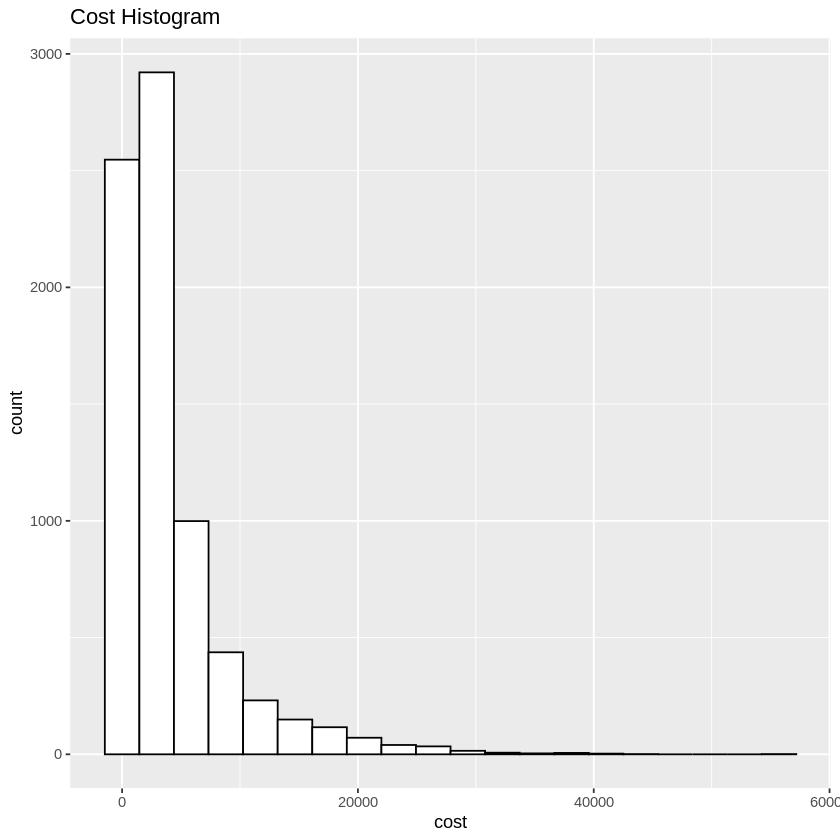

In [ ]:
library(tidyverse)
HistPlotCost1 <- ggplot(df_HMO_data, aes(x=cost)) + geom_histogram(bins = 20,color="black", fill="white")
HistPlotCost1 <- HistPlotCost1 + ggtitle("Cost Histogram")
HistPlotCost1

Warning message:
“Removed 4387 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


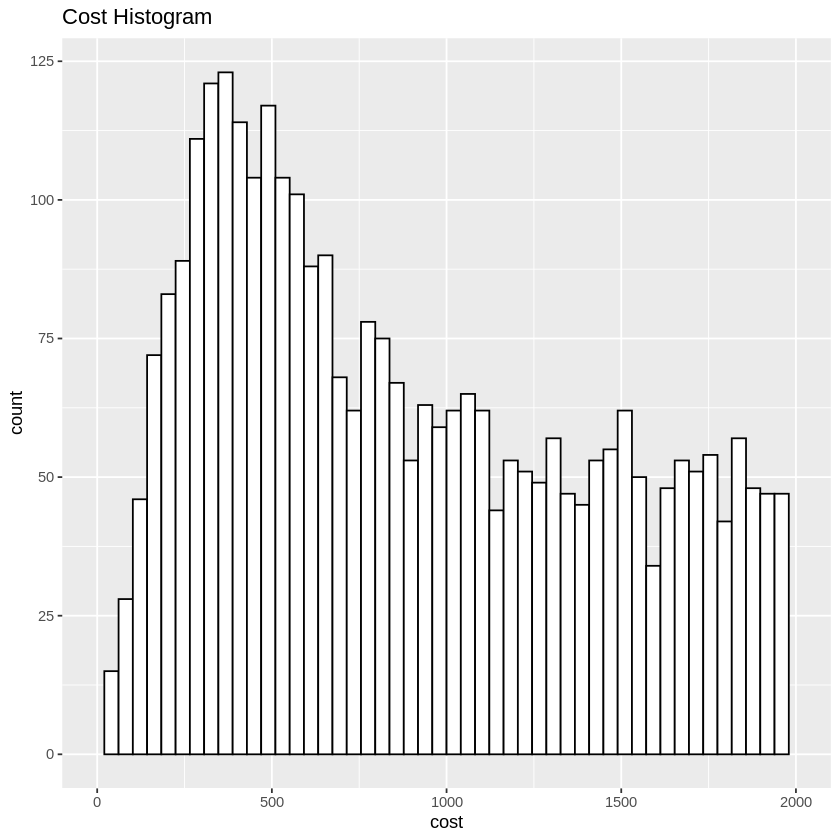

In [ ]:
#removing skewness by increasing bins
library(tidyverse)
HistPlotCost2 <- ggplot(df_HMO_data, aes(x=cost)) + geom_histogram(bins = 50,color="black", fill="white") + xlim(0,2000)
HistPlotCost2 <- HistPlotCost2 + ggtitle("Cost Histogram")
HistPlotCost2

hypertension_cat <- function(x){
  r <- case_when((is.na(x)) ~'NA'
    , x = 0 ~ 'no'
    , (x = 1) ~ 'yes')
  return(r)
}
  df_HMO_data <- df_HMO_data %>% mutate(hypertension_category = hypertension_cat(hypertension))

LINEAR MODELS

Linear Model:
All the variables as the independent variable to find out which variables have a statistically significant relationship with cost.
Also checked other combinations of independent variables against cost

In [ ]:
lm_all <- lm(cost ~age+bmi+children+smoker+location+location_type+education_level+yearly_physical+exercise+married+hypertension+gender, data = df_HMO_data)
print(lm_all)
summary(lm_all)


Call:
lm(formula = cost ~ age + bmi + children + smoker + location + 
    location_type + education_level + yearly_physical + exercise + 
    married + hypertension + gender, data = df_HMO_data)

Coefficients:
                     (Intercept)                               age  
                        -9146.73                            102.43  
                             bmi                          children  
                          181.40                            232.98  
                       smokeryes                  locationMARYLAND  
                         7664.40                           -130.44  
           locationMASSACHUSETTS                locationNEW JERSEY  
                            9.23                            112.88  
                locationNEW YORK              locationPENNSYLVANIA  
                          468.52                             16.59  
            locationRHODE ISLAND                location_typeUrban  
                          114.


Call:
lm(formula = cost ~ age + bmi + children + smoker + location + 
    location_type + education_level + yearly_physical + exercise + 
    married + hypertension + gender, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
-11987  -1481   -356   1008  41747 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -9146.733    269.404 -33.952  < 2e-16 ***
age                                102.434      2.630  38.949  < 2e-16 ***
bmi                                181.403      6.232  29.109  < 2e-16 ***
children                           232.984     30.477   7.645 2.35e-14 ***
smokeryes                         7664.403     93.752  81.752  < 2e-16 ***
locationMARYLAND                  -130.442    175.776  -0.742 0.458054    
locationMASSACHUSETTS                9.230    198.370   0.047 0.962889    
locationNEW JERSEY                 112.878    194.544   0.580 0.561784    
locationNEW YORK              

In [ ]:
lm_out <- lm(cost ~ smoker, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ smoker, data = df_HMO_data)

Coefficients:
(Intercept)    smokeryes  
       2545         7681  




Call:
lm(formula = cost ~ smoker, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
-10148  -1974   -681   1214  45489 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2544.62      49.62   51.28   <2e-16 ***
smokeryes    7681.14     112.36   68.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3877 on 7580 degrees of freedom
Multiple R-squared:  0.3814,	Adjusted R-squared:  0.3813 
F-statistic:  4674 on 1 and 7580 DF,  p-value: < 2.2e-16


In [ ]:
lm_out <- lm(cost ~ exercise, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ exercise, data = df_HMO_data)

Coefficients:
       (Intercept)  exerciseNot-Active  
              2469                2095  




Call:
lm(formula = cost ~ exercise, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -4468  -2732  -1384    688  51150 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2469.3      111.5   22.15   <2e-16 ***
exerciseNot-Active   2095.4      128.7   16.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4845 on 7580 degrees of freedom
Multiple R-squared:  0.0338,	Adjusted R-squared:  0.03368 
F-statistic: 265.2 on 1 and 7580 DF,  p-value: < 2.2e-16


In [ ]:
lm_out <- lm(cost ~ hypertension, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ hypertension, data = df_HMO_data)

Coefficients:
 (Intercept)  hypertension  
      3955.6         440.2  




Call:
lm(formula = cost ~ hypertension, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -4355  -3065  -1529    762  51319 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3955.64      63.18  62.605  < 2e-16 ***
hypertension   440.22     141.86   3.103  0.00192 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4926 on 7580 degrees of freedom
Multiple R-squared:  0.001269,	Adjusted R-squared:  0.001137 
F-statistic: 9.629 on 1 and 7580 DF,  p-value: 0.001922


In [ ]:
lm_out <- lm(cost ~ children, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ children, data = df_HMO_data)

Coefficients:
(Intercept)     children  
     3634.6        368.1  




Call:
lm(formula = cost ~ children, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -5327  -3030  -1563    782  51712 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3634.57      76.23  47.681  < 2e-16 ***
children      368.10      46.25   7.959 1.98e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4909 on 7580 degrees of freedom
Multiple R-squared:  0.008289,	Adjusted R-squared:  0.008158 
F-statistic: 63.35 on 1 and 7580 DF,  p-value: 1.98e-15


In [ ]:
lm_out <- lm(cost ~ age + bmi + smoker, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ age + bmi + smoker, data = df_HMO_data)

Coefficients:
(Intercept)          age          bmi    smokeryes  
    -6975.2        103.5        178.7       7639.4  




Call:
lm(formula = cost ~ age + bmi + smoker, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
-13950  -1484   -261    928  42594 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6975.207    222.841  -31.30   <2e-16 ***
age           103.512      2.753   37.60   <2e-16 ***
bmi           178.683      6.530   27.36   <2e-16 ***
smokeryes    7639.434     98.040   77.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3383 on 7578 degrees of freedom
Multiple R-squared:  0.5292,	Adjusted R-squared:  0.529 
F-statistic:  2839 on 3 and 7578 DF,  p-value: < 2.2e-16


In [ ]:
lm_out <- lm(cost ~ age + bmi+ exercise, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ age + bmi + exercise, data = df_HMO_data)

Coefficients:
       (Intercept)                 age                 bmi  exerciseNot-Active  
           -7256.3               105.5               181.6              2134.6  




Call:
lm(formula = cost ~ age + bmi + exercise, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6789  -2479  -1341    801  48157 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -7256.286    306.096  -23.71   <2e-16 ***
age                  105.497      3.617   29.17   <2e-16 ***
bmi                  181.638      8.581   21.17   <2e-16 ***
exerciseNot-Active  2134.635    118.054   18.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4445 on 7578 degrees of freedom
Multiple R-squared:  0.187,	Adjusted R-squared:  0.1867 
F-statistic:   581 on 3 and 7578 DF,  p-value: < 2.2e-16


In [ ]:
lm_out <- lm(cost ~ smoker+ bmi+exercise+hypertension, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ smoker + bmi + exercise + hypertension, data = df_HMO_data)

Coefficients:
       (Intercept)           smokeryes                 bmi  exerciseNot-Active  
           -5501.0              7715.6               203.9              2265.3  
      hypertension  
             300.3  




Call:
lm(formula = cost ~ smoker + bmi + exercise + hypertension, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
-10814  -1971   -281   1334  44044 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5501.015    228.010 -24.126  < 2e-16 ***
smokeryes           7715.584    102.920  74.966  < 2e-16 ***
bmi                  203.857      6.824  29.876  < 2e-16 ***
exerciseNot-Active  2265.280     94.308  24.020  < 2e-16 ***
hypertension         300.332    102.256   2.937  0.00332 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3550 on 7577 degrees of freedom
Multiple R-squared:  0.4814,	Adjusted R-squared:  0.4812 
F-statistic:  1759 on 4 and 7577 DF,  p-value: < 2.2e-16


In [ ]:
lm_out <- lm(cost ~ exercise+hypertension, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ exercise + hypertension, data = df_HMO_data)

Coefficients:
       (Intercept)  exerciseNot-Active        hypertension  
            2385.7              2093.4               428.9  




Call:
lm(formula = cost ~ exercise + hypertension, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -4751  -2754  -1373    676  50807 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2385.7      114.7  20.798  < 2e-16 ***
exerciseNot-Active   2093.4      128.6  16.279  < 2e-16 ***
hypertension          428.9      139.5   3.076  0.00211 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4842 on 7579 degrees of freedom
Multiple R-squared:  0.03501,	Adjusted R-squared:  0.03475 
F-statistic: 137.5 on 2 and 7579 DF,  p-value: < 2.2e-16


In [ ]:
lm_out <- lm(cost ~ age + smoker, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ age + smoker, data = df_HMO_data)

Coefficients:
(Intercept)          age    smokeryes  
    -1749.8        110.6       7644.4  




Call:
lm(formula = cost ~ age + smoker, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
-12664  -1234   -291    519  42962 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1749.845    120.390  -14.54   <2e-16 ***
age           110.623      2.872   38.51   <2e-16 ***
smokeryes    7644.428    102.763   74.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3546 on 7579 degrees of freedom
Multiple R-squared:  0.4827,	Adjusted R-squared:  0.4825 
F-statistic:  3535 on 2 and 7579 DF,  p-value: < 2.2e-16


In [ ]:
str(df_HMO_data)

'data.frame':	7582 obs. of  21 variables:
 $ X              : int  1 2 3 4 5 7 9 10 11 12 ...
 $ age            : int  18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num  27.9 33.8 33 22.7 28.9 ...
 $ children       : int  0 1 3 0 0 1 2 0 0 0 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 2 ...
 $ location       : chr  "CONNECTICUT" "RHODE ISLAND" "MASSACHUSETTS" "PENNSYLVANIA" ...
 $ location_type  : Factor w/ 2 levels "Country","Urban": 2 2 2 1 1 2 2 1 2 2 ...
 $ education_level: Factor w/ 4 levels "Bachelor","Master",..: 1 1 2 2 4 1 1 1 1 3 ...
 $ yearly_physical: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ exercise       : Factor w/ 2 levels "Active","Not-Active": 1 2 1 2 2 2 1 2 1 1 ...
 $ married        : Factor w/ 2 levels "Married","Not_Married": 1 1 1 1 1 1 1 1 1 1 ...
 $ hypertension   : num  0 0 0 1 0 0 0 1 0 0 ...
 $ gender         : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 2 1 2 1 ...
 $ cost           : int  1746 602 5

# BEST LM MODEL

In [ ]:
# BEST MODEL
lm_out <- lm(cost ~ age + bmi + smoker + hypertension + children + exercise, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ age + bmi + smoker + hypertension + children + 
    exercise, data = df_HMO_data)

Coefficients:
       (Intercept)                 age                 bmi           smokeryes  
           -9040.2               102.3               181.3              7666.9  
      hypertension            children  exerciseNot-Active  
             338.7               235.2              2260.0  




Call:
lm(formula = cost ~ age + bmi + smoker + hypertension + children + 
    exercise, data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
-12188  -1490   -356   1012  41783 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -9040.156    225.143 -40.153  < 2e-16 ***
age                  102.281      2.629  38.912  < 2e-16 ***
bmi                  181.348      6.222  29.147  < 2e-16 ***
smokeryes           7666.889     93.438  82.053  < 2e-16 ***
hypertension         338.720     92.825   3.649 0.000265 ***
children             235.154     30.441   7.725 1.26e-14 ***
exerciseNot-Active  2260.047     85.602  26.402  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3222 on 7575 degrees of freedom
Multiple R-squared:  0.5729,	Adjusted R-squared:  0.5726 
F-statistic:  1694 on 6 and 7575 DF,  p-value: < 2.2e-16


In [ ]:
lm_out <- lm(cost ~ age + bmi + smoker + children + exercise, data = df_HMO_data)
print(lm_out)
summary(lm_out)


Call:
lm(formula = cost ~ age + bmi + smoker + children + exercise, 
    data = df_HMO_data)

Coefficients:
       (Intercept)                 age                 bmi           smokeryes  
           -8977.3               102.2               181.5              7671.6  
          children  exerciseNot-Active  
             236.4              2261.7  




Call:
lm(formula = cost ~ age + bmi + smoker + children + exercise, 
    data = df_HMO_data)

Residuals:
   Min     1Q Median     3Q    Max 
-12257  -1484   -367   1001  42053 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -8977.331    224.666  -39.96  < 2e-16 ***
age                  102.153      2.630   38.84  < 2e-16 ***
bmi                  181.537      6.227   29.16  < 2e-16 ***
smokeryes           7671.606     93.505   82.05  < 2e-16 ***
children             236.409     30.464    7.76 9.58e-15 ***
exerciseNot-Active  2261.677     85.670   26.40  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3225 on 7576 degrees of freedom
Multiple R-squared:  0.5722,	Adjusted R-squared:  0.5719 
F-statistic:  2026 on 5 and 7576 DF,  p-value: < 2.2e-16


---

SVM MODELS

In [ ]:
EnsurePackage('rio')
EnsurePackage('caret')
EnsurePackage('kernlab')
EnsurePackage('e1071')

Loading required package: rio

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rio’”
Loading required package: rio

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rio’”
also installing the dependency ‘openxlsx’


Loading required package: rio

Loading required package: e1071


Attaching package: ‘e1071’


The following object is masked from ‘package:Hmisc’:

    impute




In [ ]:
library(rio)
library(caret)
library(kernlab)
library(e1071)

---

In [ ]:
df_HMO_sub <- df_HMO_data
cols <- c("age", "bmi", "children","cost", "smoker", "exercise", "hypertension" )
df_HMO_sub<-df_HMO_sub[,cols]
head(df_HMO_sub)

set.seed(111)
subHMO<- df_HMO_sub
trainList <- createDataPartition(y=subHMO$cost,p=0.70,list=FALSE)
trainSet <- subHMO[trainList,]
testSet <- subHMO[-trainList,]

,age,bmi,children,cost,smoker,exercise,hypertension
,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<dbl>
1,18,27.900,0,1746,yes,Active,0
2,19,33.770,1,602,no,Not-Active,0
3,27,33.000,3,576,no,Active,0
4,34,22.705,0,5562,no,Not-Active,1
5,32,28.880,0,836,no,Not-Active,0
6,47,33.440,1,3842,no,Not-Active,0


In [ ]:
fit1 <- train(cost~.,data = trainSet, method="svmRadial",preProc=c("center","scale"))
fit1

Support Vector Machines with Radial Basis Function Kernel 

5310 samples
   6 predictor

Pre-processing: centered (6), scaled (6) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 5310, 5310, 5310, 5310, 5310, 5310, ... 
Resampling results across tuning parameters:

  C     RMSE      Rsquared   MAE     
  0.25  2613.046  0.7333921  1405.297
  0.50  2600.813  0.7336134  1401.378
  1.00  2596.782  0.7330647  1402.356

Tuning parameter 'sigma' was held constant at a value of 0.1676783
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.1676783 and C = 1.

---

In [ ]:
str(df_HMO_data)

'data.frame':	7582 obs. of  21 variables:
 $ X              : int  1 2 3 4 5 7 9 10 11 12 ...
 $ age            : int  18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num  27.9 33.8 33 22.7 28.9 ...
 $ children       : int  0 1 3 0 0 1 2 0 0 0 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 2 ...
 $ location       : chr  "CONNECTICUT" "RHODE ISLAND" "MASSACHUSETTS" "PENNSYLVANIA" ...
 $ location_type  : Factor w/ 2 levels "Country","Urban": 2 2 2 1 1 2 2 1 2 2 ...
 $ education_level: Factor w/ 4 levels "Bachelor","Master",..: 1 1 2 2 4 1 1 1 1 3 ...
 $ yearly_physical: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ exercise       : Factor w/ 2 levels "Active","Not-Active": 1 2 1 2 2 2 1 2 1 1 ...
 $ married        : Factor w/ 2 levels "Married","Not_Married": 1 1 1 1 1 1 1 1 1 1 ...
 $ hypertension   : num  0 0 0 1 0 0 0 1 0 0 ...
 $ gender         : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 2 1 2 1 ...
 $ cost           : int  1746 602 5

In [ ]:
df_HMO_sub <- df_HMO_data
cols <- c("age", "bmi", "children","cost_class", "smoker", "exercise", "hypertension" )
df_HMO_sub<-df_HMO_sub[,cols]
# head(df_HMO_sub)

set.seed(111)
subHMO<- df_HMO_sub
trainList <- createDataPartition(y=subHMO$cost_class,p=0.70,list=FALSE)
trainSet <- subHMO[trainList,]
df_HMO_sub$cost_class <- as.factor(df_HMO_sub$cost_class)
testSet <- subHMO[-trainList,]
testSet <- testSet[-which(testSet$cost_class == '49530-55720'),]
head(testSet)

Warning message in createDataPartition(y = subHMO$cost_class, p = 0.7, list = FALSE):
“Some classes have no records ( 49530-55720 ) and these will be ignored”
Warning message in createDataPartition(y = subHMO$cost_class, p = 0.7, list = FALSE):
“Some classes have a single record ( 55721-6192 ) and these will be selected for the sample”


age,bmi,children,cost_class,smoker,exercise,hypertension
<int>,<dbl>,<int>,<fct>,<fct>,<fct>,<dbl>


In [ ]:
summary(testSet)

      age             bmi           children           cost_class   smoker    
 Min.   :18.00   Min.   :15.96   Min.   :0.000   2-6192     :1798   no :1820  
 1st Qu.:26.00   1st Qu.:26.46   1st Qu.:0.000   6193-12383 : 296   yes: 451  
 Median :40.00   Median :30.40   Median :1.000   12384-18574:  97             
 Mean   :39.45   Mean   :30.75   Mean   :1.113   18575-24765:  51             
 3rd Qu.:52.00   3rd Qu.:34.48   3rd Qu.:2.000   24766-30956:  19             
 Max.   :66.00   Max.   :53.13   Max.   :5.000   30957-37147:   6             
                                                 (Other)    :   4             
       exercise     hypertension   
 Active    : 572   Min.   :0.0000  
 Not-Active:1699   1st Qu.:0.0000  
                   Median :0.0000  
                   Mean   :0.1968  
                   3rd Qu.:0.0000  
                   Max.   :1.0000  
                                   

In [ ]:
fit1 <- train(cost_class~.,data = trainSet, method="svmRadial",preProc=c("center","scale"))
fit1

ERROR: ignored

---

In [ ]:
df_HMO_sub <- df_HMO_data
cols <- c("age", "bmi", "children","cost_category", "smoker", "exercise", "hypertension" )
df_HMO_sub<-df_HMO_sub[,cols]
df_HMO_sub$cost_category <- as.factor(df_HMO_sub$cost_category)
head(df_HMO_sub)


,age,bmi,children,cost_category,smoker,exercise,hypertension
,<int>,<dbl>,<int>,<fct>,<fct>,<fct>,<dbl>
1,18,27.900,0,Inexpensive,yes,Active,0
2,19,33.770,1,Inexpensive,no,Not-Active,0
3,27,33.000,3,Inexpensive,no,Active,0
4,34,22.705,0,Expensive,no,Not-Active,1
5,32,28.880,0,Inexpensive,no,Not-Active,0
6,47,33.440,1,Expensive,no,Not-Active,0


Training Test split

In [ ]:
library(rio)
library(caret)
library(kernlab)

set.seed(111)
subHMO<- df_HMO_sub
trainList <- createDataPartition(y=subHMO$cost_category,p=0.70,list=FALSE)
trainSet <- subHMO[trainList,]
testSet <- subHMO[-trainList,]

In [ ]:
dim(trainSet)
dim(testSet)

[1] 5308    7

[1] 2274    7

---

In [ ]:
fit1 <- train(cost_category~.,data = trainSet, method="svmRadial",preProc=c("center","scale"))
fit1

In [ ]:
library(caret)
library(kernlab)

fit1 <- train(cost_category~.,data = trainSet, method="svmRadial",preProc=c("center","scale"))
fit1

Support Vector Machines with Radial Basis Function Kernel 

5308 samples
   6 predictor
   2 classes: 'Expensive', 'Inexpensive' 

Pre-processing: centered (6), scaled (6) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 5308, 5308, 5308, 5308, 5308, 5308, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.8479854  0.6959078
  0.50  0.8481425  0.6962155
  1.00  0.8483527  0.6966497

Tuning parameter 'sigma' was held constant at a value of 0.1724707
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1724707 and C = 1.

In [ ]:
summary(fit1)

Length  Class   Mode 
     1   ksvm     S4 

#Best Model SVM

In [ ]:
# library(caret)
# library(kernlab)

svmPred <-predict(fit1,testSet)
confusion1 <- table(svmPred, testSet$cost_category)
confusion1
prop.table(confusion1)
confusion2 <- confusionMatrix(svmPred, testSet$cost_category)
confusion2

             
svmPred       Expensive Inexpensive
  Expensive         956         158
  Inexpensive       181         979

             
svmPred        Expensive Inexpensive
  Expensive   0.42040457  0.06948109
  Inexpensive 0.07959543  0.43051891

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         956         158
  Inexpensive       181         979
                                          
               Accuracy : 0.8509          
                 95% CI : (0.8356, 0.8653)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7018          
                                          
 Mcnemar's Test P-Value : 0.2321          
                                          
            Sensitivity : 0.8408          
            Specificity : 0.8610          
         Pos Pred Value : 0.8582          
         Neg Pred Value : 0.8440          
             Prevalence : 0.5000          
         Detection Rate : 0.4204          
   Detection Prevalence : 0.4899          
      Balanced Accuracy : 0.8509          
                                          
       'Positive' C

In [ ]:
# library(caret)
# library(kernlab)

fit <- train(cost_category~age+bmi+smoker,data = trainSet, method="svmRadial",preProc=c("center","scale"))
fit
svmPred <-predict(fit,testSet)
confusion1 <- table(svmPred, testSet$cost_category)
confusion1
prop.table(confusion1)
confusion2 <- confusionMatrix(svmPred, testSet$cost_category)
confusion2

Support Vector Machines with Radial Basis Function Kernel 

5308 samples
   3 predictor
   2 classes: 'Expensive', 'Inexpensive' 

Pre-processing: centered (3), scaled (3) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 5308, 5308, 5308, 5308, 5308, 5308, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.8035611  0.6072065
  0.50  0.8040540  0.6081800
  1.00  0.8041408  0.6083544

Tuning parameter 'sigma' was held constant at a value of 0.8391853
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.8391853 and C = 1.

             
svmPred       Expensive Inexpensive
  Expensive         977         284
  Inexpensive       160         853

             
svmPred       Expensive Inexpensive
  Expensive   0.4296394   0.1248901
  Inexpensive 0.0703606   0.3751099

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         977         284
  Inexpensive       160         853
                                          
               Accuracy : 0.8047          
                 95% CI : (0.7878, 0.8209)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6095          
                                          
 Mcnemar's Test P-Value : 5.305e-09       
                                          
            Sensitivity : 0.8593          
            Specificity : 0.7502          
         Pos Pred Value : 0.7748          
         Neg Pred Value : 0.8421          
             Prevalence : 0.5000          
         Detection Rate : 0.4296          
   Detection Prevalence : 0.5545          
      Balanced Accuracy : 0.8047          
                                          
       'Positive' C

In [ ]:
library(caret)
library(kernlab)
fit <- train(cost_category~age+bmi+exercise,data = trainSet, method="svmRadial",preProc=c("center","scale"))
fit
svmPred <-predict(fit,testSet)
confusion1 <- table(svmPred, testSet$cost_category)
confusion1
prop.table(confusion1)
confusion2 <- confusionMatrix(svmPred, testSet$cost_category)
confusion2

Support Vector Machines with Radial Basis Function Kernel 

5308 samples
   3 predictor
   2 classes: 'Expensive', 'Inexpensive' 

Pre-processing: centered (3), scaled (3) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 5308, 5308, 5308, 5308, 5308, 5308, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7673739  0.5343628
  0.50  0.7670460  0.5336986
  1.00  0.7668787  0.5333642

Tuning parameter 'sigma' was held constant at a value of 0.7235525
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.7235525 and C = 0.25.

             
svmPred       Expensive Inexpensive
  Expensive         801         171
  Inexpensive       336         966

             
svmPred        Expensive Inexpensive
  Expensive   0.35224274  0.07519789
  Inexpensive 0.14775726  0.42480211

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         801         171
  Inexpensive       336         966
                                         
               Accuracy : 0.777          
                 95% CI : (0.7594, 0.794)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5541         
                                         
 Mcnemar's Test P-Value : 3.253e-13      
                                         
            Sensitivity : 0.7045         
            Specificity : 0.8496         
         Pos Pred Value : 0.8241         
         Neg Pred Value : 0.7419         
             Prevalence : 0.5000         
         Detection Rate : 0.3522         
   Detection Prevalence : 0.4274         
      Balanced Accuracy : 0.7770         
                                         
       'Positive' Class : Expensive   

In [ ]:
library(caret)
library(kernlab)
fit <- train(cost_category~bmi+smoker+(exercise=="Not-Active")+hypertension,data = trainSet, method="svmRadial",preProc=c("center","scale"))
fit
svmPred <-predict(fit,testSet)
confusion1 <- table(svmPred, testSet$cost_category)
confusion1
prop.table(confusion1)
confusion2 <- confusionMatrix(svmPred, testSet$cost_category)
confusion2

Support Vector Machines with Radial Basis Function Kernel 

5308 samples
   4 predictor
   2 classes: 'Expensive', 'Inexpensive' 

Pre-processing: centered (4), scaled (4) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 5308, 5308, 5308, 5308, 5308, 5308, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.6828712  0.3660663
  0.50  0.6828748  0.3660504
  1.00  0.6828086  0.3659685

Tuning parameter 'sigma' was held constant at a value of 1.335887
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 1.335887 and C = 0.5.

             
svmPred       Expensive Inexpensive
  Expensive         712         289
  Inexpensive       425         848

             
svmPred       Expensive Inexpensive
  Expensive   0.3131047   0.1270888
  Inexpensive 0.1868953   0.3729112

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         712         289
  Inexpensive       425         848
                                          
               Accuracy : 0.686           
                 95% CI : (0.6665, 0.7051)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.372           
                                          
 Mcnemar's Test P-Value : 4.366e-07       
                                          
            Sensitivity : 0.6262          
            Specificity : 0.7458          
         Pos Pred Value : 0.7113          
         Neg Pred Value : 0.6661          
             Prevalence : 0.5000          
         Detection Rate : 0.3131          
   Detection Prevalence : 0.4402          
      Balanced Accuracy : 0.6860          
                                          
       'Positive' C

In [ ]:
library(caret)
library(kernlab)
fit <- train(cost_category~bmi+smoker+exercise+hypertension,data = trainSet, method="svmRadial",preProc=c("center","scale"))
fit
svmPred <-predict(fit,testSet)
confusion1 <- table(svmPred, testSet$cost_category)
confusion1
prop.table(confusion1)
confusion2 <- confusionMatrix(svmPred, testSet$cost_category)
confusion2

Support Vector Machines with Radial Basis Function Kernel 

5308 samples
   4 predictor
   2 classes: 'Expensive', 'Inexpensive' 

Pre-processing: centered (4), scaled (4) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 5308, 5308, 5308, 5308, 5308, 5308, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.6793699  0.3593907
  0.50  0.6792690  0.3591815
  1.00  0.6797436  0.3601109

Tuning parameter 'sigma' was held constant at a value of 1.351174
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 1.351174 and C = 1.

             
svmPred       Expensive Inexpensive
  Expensive         716         289
  Inexpensive       421         848

             
svmPred       Expensive Inexpensive
  Expensive   0.3148637   0.1270888
  Inexpensive 0.1851363   0.3729112

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         716         289
  Inexpensive       421         848
                                          
               Accuracy : 0.6878          
                 95% CI : (0.6683, 0.7068)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3755          
                                          
 Mcnemar's Test P-Value : 8.818e-07       
                                          
            Sensitivity : 0.6297          
            Specificity : 0.7458          
         Pos Pred Value : 0.7124          
         Neg Pred Value : 0.6682          
             Prevalence : 0.5000          
         Detection Rate : 0.3149          
   Detection Prevalence : 0.4420          
      Balanced Accuracy : 0.6878          
                                          
       'Positive' C

KSVM MODELS

In [ ]:
library(caret)
library(kernlab)
modksvm	<- ksvm(cost_category~.,data=trainSet, C=5,cross=3,prob.model=TRUE)
modksvm
predout <-predict(modksvm,testSet)
confusion1 <- table(predout, testSet$cost_category)
prop.table(confusion1)
confusion2 <- confusionMatrix(predout, testSet$cost_category)
confusion2

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.228794490504832 

Number of Support Vectors : 1890 

Objective Function Value : -8623.44 
Training error : 0.13847 
Cross validation error : 0.150905 
Probability model included. 

             
predout        Expensive Inexpensive
  Expensive   0.42392260  0.07651715
  Inexpensive 0.07607740  0.42348285

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         964         174
  Inexpensive       173         963
                                        
               Accuracy : 0.8474        
                 95% CI : (0.832, 0.862)
    No Information Rate : 0.5           
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.6948        
                                        
 Mcnemar's Test P-Value : 1             
                                        
            Sensitivity : 0.8478        
            Specificity : 0.8470        
         Pos Pred Value : 0.8471        
         Neg Pred Value : 0.8477        
             Prevalence : 0.5000        
         Detection Rate : 0.4239        
   Detection Prevalence : 0.5004        
      Balanced Accuracy : 0.8474        
                                        
       'Positive' Class : Expensive     
                

In [ ]:
library(caret)
library(kernlab)
modksvm	<- ksvm(cost_category~bmi+smoker+exercise,data=trainSet, C=5,cross=3,prob.model=TRUE)
modksvm
predout <-predict(modksvm,testSet)
confusion1 <- table(predout, testSet$cost_category)
prop.table(confusion1)
confusion2 <- confusionMatrix(predout, testSet$cost_category)
confusion2

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  2.96093710633448 

Number of Support Vectors : 3525 

Objective Function Value : -16331.47 
Training error : 0.301997 
Cross validation error : 0.302939 
Probability model included. 

             
predout       Expensive Inexpensive
  Expensive   0.3069481   0.1165347
  Inexpensive 0.1930519   0.3834653

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         698         265
  Inexpensive       439         872
                                         
               Accuracy : 0.6904         
                 95% CI : (0.671, 0.7094)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.3808         
                                         
 Mcnemar's Test P-Value : 7.022e-11      
                                         
            Sensitivity : 0.6139         
            Specificity : 0.7669         
         Pos Pred Value : 0.7248         
         Neg Pred Value : 0.6651         
             Prevalence : 0.5000         
         Detection Rate : 0.3069         
   Detection Prevalence : 0.4235         
      Balanced Accuracy : 0.6904         
                                         
       'Positive' Class : Expensive   

In [ ]:
library(caret)
library(kernlab)
modksvm	<- ksvm(cost_category~bmi+smoker+hypertension,data=trainSet, C=5,cross=3,prob.model=TRUE)
modksvm
predout <-predict(modksvm,testSet)
confusion1 <- table(predout, testSet$cost_category)
prop.table(confusion1)
confusion2 <- confusionMatrix(predout, testSet$cost_category)
confusion2

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  3.52965247539185 

Number of Support Vectors : 3739 

Objective Function Value : -17293.12 
Training error : 0.320271 
Cross validation error : 0.330634 
Probability model included. 

             
predout        Expensive Inexpensive
  Expensive   0.22295515  0.06948109
  Inexpensive 0.27704485  0.43051891

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         507         158
  Inexpensive       630         979
                                         
               Accuracy : 0.6535         
                 95% CI : (0.6335, 0.673)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.3069         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.4459         
            Specificity : 0.8610         
         Pos Pred Value : 0.7624         
         Neg Pred Value : 0.6085         
             Prevalence : 0.5000         
         Detection Rate : 0.2230         
   Detection Prevalence : 0.2924         
      Balanced Accuracy : 0.6535         
                                         
       'Positive' Class : Expensive   

In [ ]:
library(caret)
library(kernlab)
modksvm	<- ksvm(cost_category~bmi+exercise+hypertension,data=trainSet, C=5,cross=3,prob.model=TRUE)
modksvm
predout <-predict(modksvm,testSet)
confusion1 <- table(predout, testSet$cost_category)
prop.table(confusion1)
confusion2 <- confusionMatrix(predout, testSet$cost_category)
confusion2

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  2.58660565204118 

Number of Support Vectors : 4336 

Objective Function Value : -20448.69 
Training error : 0.385833 
Cross validation error : 0.393934 
Probability model included. 

             
predout        Expensive Inexpensive
  Expensive   0.40061566  0.28715919
  Inexpensive 0.09938434  0.21284081

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         911         653
  Inexpensive       226         484
                                          
               Accuracy : 0.6135          
                 95% CI : (0.5931, 0.6335)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2269          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8012          
            Specificity : 0.4257          
         Pos Pred Value : 0.5825          
         Neg Pred Value : 0.6817          
             Prevalence : 0.5000          
         Detection Rate : 0.4006          
   Detection Prevalence : 0.6878          
      Balanced Accuracy : 0.6135          
                                          
       'Positive' C

In [ ]:
library(caret)
library(kernlab)
modksvm	<- ksvm(cost_category~age+exercise+hypertension,data=trainSet, C=5,cross=3,prob.model=TRUE)
modksvm
predout <-predict(modksvm,testSet)
confusion1 <- table(predout, testSet$cost_category)
prop.table(confusion1)
confusion2 <- confusionMatrix(predout, testSet$cost_category)
confusion2

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  2.86433666503225 

Number of Support Vectors : 2732 

Objective Function Value : -12747.52 
Training error : 0.235682 
Cross validation error : 0.240201 
Probability model included. 

             
predout        Expensive Inexpensive
  Expensive   0.34872471  0.08443272
  Inexpensive 0.15127529  0.41556728

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         793         192
  Inexpensive       344         945
                                          
               Accuracy : 0.7643          
                 95% CI : (0.7463, 0.7816)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5286          
                                          
 Mcnemar's Test P-Value : 6.928e-11       
                                          
            Sensitivity : 0.6974          
            Specificity : 0.8311          
         Pos Pred Value : 0.8051          
         Neg Pred Value : 0.7331          
             Prevalence : 0.5000          
         Detection Rate : 0.3487          
   Detection Prevalence : 0.4332          
      Balanced Accuracy : 0.7643          
                                          
       'Positive' C

In [ ]:
library(caret)
library(kernlab)
modksvm	<- ksvm(cost_category~bmi+smoker+exercise+hypertension,data=trainSet, C=5,cross=3,prob.model=TRUE)
modksvm
predout <-predict(modksvm,testSet)
confusion1 <- table(predout, testSet$cost_category)
prop.table(confusion1)
confusion2 <- confusionMatrix(predout, testSet$cost_category)
confusion2

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  1.60430150230418 

Number of Support Vectors : 3551 

Objective Function Value : -16481.03 
Training error : 0.306895 
Cross validation error : 0.307838 
Probability model included. 

             
predout       Expensive Inexpensive
  Expensive   0.3021108   0.1156552
  Inexpensive 0.1978892   0.3843448

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive         687         263
  Inexpensive       450         874
                                          
               Accuracy : 0.6865          
                 95% CI : (0.6669, 0.7055)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3729          
                                          
 Mcnemar's Test P-Value : 3.266e-12       
                                          
            Sensitivity : 0.6042          
            Specificity : 0.7687          
         Pos Pred Value : 0.7232          
         Neg Pred Value : 0.6601          
             Prevalence : 0.5000          
         Detection Rate : 0.3021          
   Detection Prevalence : 0.4178          
      Balanced Accuracy : 0.6865          
                                          
       'Positive' C

BUSINESS RULES

In [ ]:
hypertension_cat <- function(x){
  r <- case_when((is.na(x)) ~'NA'
    , (x == 0) ~ 'no'
    , (x == 1) ~ 'yes')
  return(r)
}
df_HMO_data <- df_HMO_data %>% mutate(hypertension_category = hypertension_cat(hypertension))
head(df_HMO_data)

,X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,⋯,gender,cost,cost_category,age_category,bmi_category,child_category,cost_class,cost_decile,cost_categories,hypertension_category
,<int>,<int>,<dbl>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,⋯,female,1746,Inexpensive,Teen,Overweight,no children,2-6192,7,1682-1961,no
2,2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,⋯,male,602,Inexpensive,Teen,Obese,2 or less,2-6192,9,562-841,no
3,3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,⋯,male,576,Inexpensive,Young Adult,Obese,more than 2,2-6192,9,562-841,no
4,4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,⋯,male,5562,Expensive,Adult,Healthy,no children,2-6192,3,5322-5601,yes
5,5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,⋯,male,836,Inexpensive,Adult,Overweight,no children,2-6192,8,562-841,no
6,7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,⋯,female,3842,Expensive,Adult,Obese,2 or less,2-6192,4,3642-3921,no


In [ ]:
df_HMO_one <- df_HMO_data
cols <- c("age_category", "bmi_category", "child_category","cost_category", "smoker","location", 
"location_type", "education_level", "yearly_physical", "exercise", "married","hypertension_category","gender" )
df_HMO_one<-df_HMO_one[,cols]
head(df_HMO_one)

,age_category,bmi_category,child_category,cost_category,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension_category,gender
,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>
1,Teen,Overweight,no children,Inexpensive,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,no,female
2,Teen,Obese,2 or less,Inexpensive,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,no,male
3,Young Adult,Obese,more than 2,Inexpensive,no,MASSACHUSETTS,Urban,Master,No,Active,Married,no,male
4,Adult,Healthy,no children,Expensive,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,yes,male
5,Adult,Overweight,no children,Inexpensive,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,no,male
6,Adult,Obese,2 or less,Expensive,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,no,female


In [ ]:
EnsurePackage('arules')
EnsurePackage('arulesViz')

Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Loading required package: arules

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:kernlab’:

    size


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: arulesViz

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arulesViz’”
Loading required package: arulesViz

Warnin

Warning message:
“Column(s) 6, 12 not logical or factor. Applying default discretization (see '? discretizeDF').”


age_category=Adult          age_category=Older Adult 
                       0.38683725                        0.28554471 
                age_category=Teen          age_category=Young Adult 
                       0.09944606                        0.22817199 
             bmi_category=Healthy                bmi_category=Obese 
                       0.15747824                        0.53917172 
          bmi_category=Overweight          bmi_category=Underweight 
                       0.29016091                        0.01318913 
         child_category=2 or less        child_category=more than 2 
                       0.41400686                        0.15615932 
       child_category=no children           cost_category=Expensive 
                       0.42983382                        0.49986811 
        cost_category=Inexpensive                         smoker=no 
                       0.50013189                        0.80493274 
                       smoker=yes              location=CONNECTICUT 
                       0.19506726                        0.08058560 
                location=MARYLAND            location=MASSACHUSETTS 
                       0.09852282                        0.06132946 
              location=NEW JERSEY                 location=NEW YORK 
                       0.06568188                        0.07214455 
            location=PENNSYLVANIA             location=RHODE ISLAND 
                       0.52888420                        0.09285149 
            location_type=Country               location_type=Urban 
                       0.25098918                        0.74901082 
         education_level=Bachelor            education_level=Master 
                       0.60379847                        0.20218940 
education_level=No College Degree               education_level=PhD 
                       0.10010551                        0.09390662 
               yearly_physical=No               yearly_physical=Yes 
                       0.75164864                        0.24835136 
                  exercise=Active               exercise=Not-Active 
                       0.24901082                        0.75098918 
                  married=Married               married=Not_Married 
                       0.66737009                        0.33262991 
         hypertension_category=no         hypertension_category=yes 
                       0.80163545                        0.19836455 
                    gender=female                       gender=male 
                       0.48298602                        0.51701398

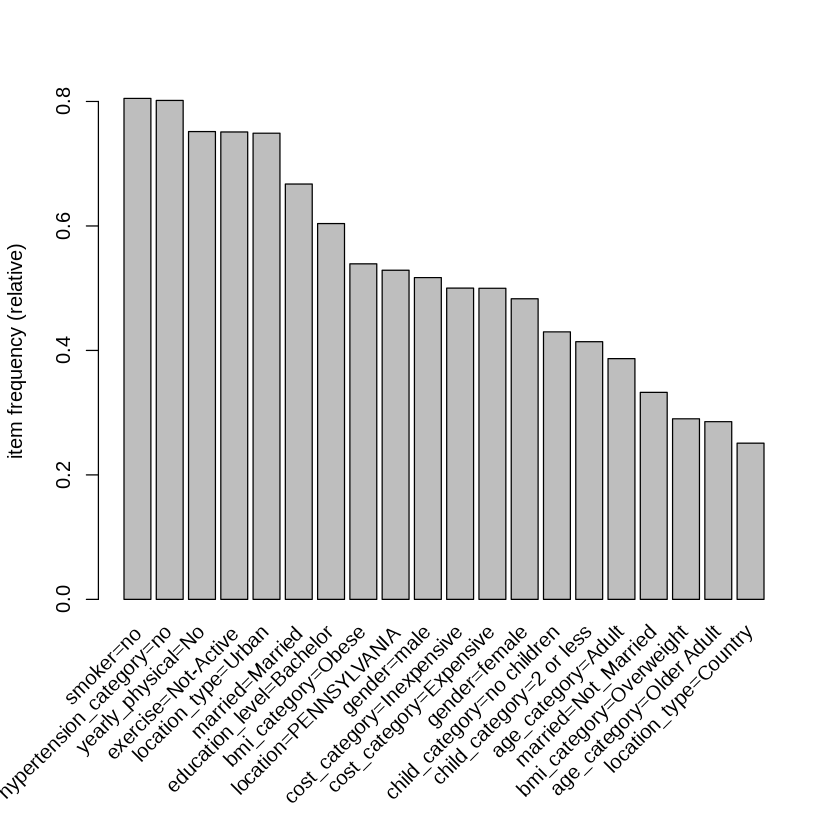

In [ ]:
library(arules)
library(arulesViz)
HMOX <-as(df_HMO_one, "transactions")
itemFrequency(HMOX)
itemFrequencyPlot(HMOX, topN = 20)

In [ ]:
library(arules)
library(arulesViz)
inspect(HMOX[1:5])

    items                         transactionID
[1] {age_category=Teen,                        
     bmi_category=Overweight,                  
     child_category=no children,               
     cost_category=Inexpensive,                
     smoker=yes,                               
     location=CONNECTICUT,                     
     location_type=Urban,                      
     education_level=Bachelor,                 
     yearly_physical=No,                       
     exercise=Active,                          
     married=Married,                          
     hypertension_category=no,                 
     gender=female}                           1
[2] {age_category=Teen,                        
     bmi_category=Obese,                       
     child_category=2 or less,                 
     cost_category=Inexpensive,                
     smoker=no,                                
     location=RHODE ISLAND,                    
     location_type=Urban,               

In [ ]:

library(arules)
library(arulesViz)
rules1 <- apriori(HMOX,
 parameter=list(supp=0.25, conf=0.5),
 control=list(verbose=F),
 appearance=list(default="lhs",rhs=("cost_category=Expensive")))

In [ ]:
library(arules)
library(arulesViz)
inspectedHMOX<-inspect(rules1)
inspectedHMOX


     lhs                            rhs                         support confidence  coverage     lift count
[1]  {gender=male}               => {cost_category=Expensive} 0.2647059  0.5119898 0.5170140 1.024250  2007
[2]  {bmi_category=Obese}        => {cost_category=Expensive} 0.3048008  0.5653131 0.5391717 1.130925  2311
[3]  {exercise=Not-Active}       => {cost_category=Expensive} 0.4264046  0.5677907 0.7509892 1.135881  3233
[4]  {yearly_physical=No}        => {cost_category=Expensive} 0.3768135  0.5013160 0.7516486 1.002897  2857
[5]  {bmi_category=Obese,                                                                                  
      exercise=Not-Active}       => {cost_category=Expensive} 0.2533632  0.6283939 0.4031918 1.257119  1921
[6]  {education_level=Bachelor,                                                                            
      exercise=Not-Active}       => {cost_category=Expensive} 0.2557373  0.5656359 0.4521235 1.131570  1939
[7]  {exercise=Not-Active,  

NULL

## Decision trees

In [ ]:
library(rio)
library(caret)
library(kernlab)

set.seed(111)
subHMO<- df_HMO_data
trainList <- createDataPartition(y=subHMO$cost_category,p=0.70,list=FALSE)

trainData <- subHMO[trainList,]
testData <- subHMO[-trainList,]

In [ ]:
install.packages('rpart.plot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
str(trainData)

'data.frame':	5308 obs. of  21 variables:
 $ X              : int  1 3 4 7 9 10 11 12 13 14 ...
 $ age            : int  18 27 34 47 36 59 24 61 22 57 ...
 $ bmi            : num  27.9 33 22.7 33.4 29.8 ...
 $ children       : int  0 3 0 1 2 0 0 0 0 0 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 2 1 1 ...
 $ location       : chr  "CONNECTICUT" "MASSACHUSETTS" "PENNSYLVANIA" "PENNSYLVANIA" ...
 $ location_type  : Factor w/ 2 levels "Country","Urban": 2 2 1 2 2 1 2 2 2 2 ...
 $ education_level: Factor w/ 4 levels "Bachelor","Master",..: 1 2 2 1 1 1 1 3 1 1 ...
 $ yearly_physical: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 2 ...
 $ exercise       : Factor w/ 2 levels "Active","Not-Active": 1 1 2 2 1 2 1 1 2 2 ...
 $ married        : Factor w/ 2 levels "Married","Not_Married": 1 1 1 1 1 1 1 1 1 1 ...
 $ hypertension   : num  0 0 1 0 0 1 0 0 0 0 ...
 $ gender         : Factor w/ 2 levels "female","male": 1 2 2 1 2 1 2 1 2 1 ...
 $ cost           : int  1746 576

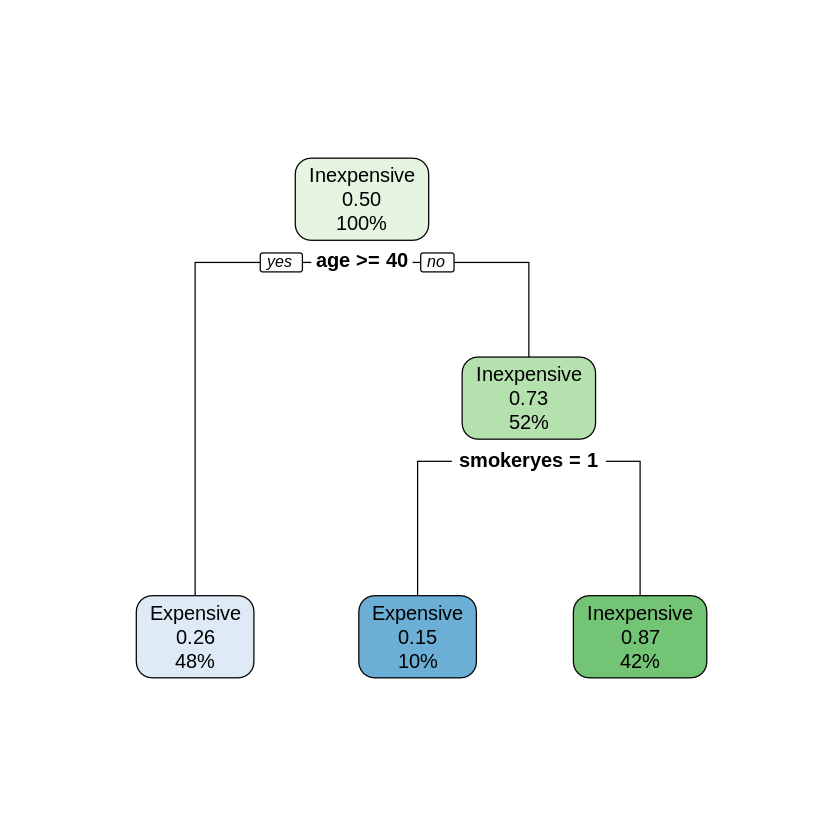

In [ ]:
library(e1071) 
library(rpart)
library(rpart.plot)
library(caret) 
library(rio) 

Tree <- train(cost_category ~smoker + bmi + age + children + location + location_type + education_level + yearly_physical + exercise + married + hypertension + gender
  , method = "rpart"
  , data =trainData) 

rpart.plot(Tree$finalModel)



In [ ]:
Tree

CART 

5308 samples
  12 predictor
   2 classes: 'Expensive', 'Inexpensive' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 5308, 5308, 5308, 5308, 5308, 5308, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.04183943  0.8128968  0.6257205
  0.13908783  0.7525272  0.5051763
  0.46852620  0.5950894  0.1994012

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.04183943.

In [ ]:
pred <- predict(Tree,testData) 

confusionMatrix(pred,as.factor(testData$cost_category))

Confusion Matrix and Statistics

             Reference
Prediction    Expensive Inexpensive
  Expensive        1013         330
  Inexpensive       124         807
                                          
               Accuracy : 0.8004          
                 95% CI : (0.7833, 0.8166)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6007          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8909          
            Specificity : 0.7098          
         Pos Pred Value : 0.7543          
         Neg Pred Value : 0.8668          
             Prevalence : 0.5000          
         Detection Rate : 0.4455          
   Detection Prevalence : 0.5906          
      Balanced Accuracy : 0.8004          
                                          
       'Positive' C

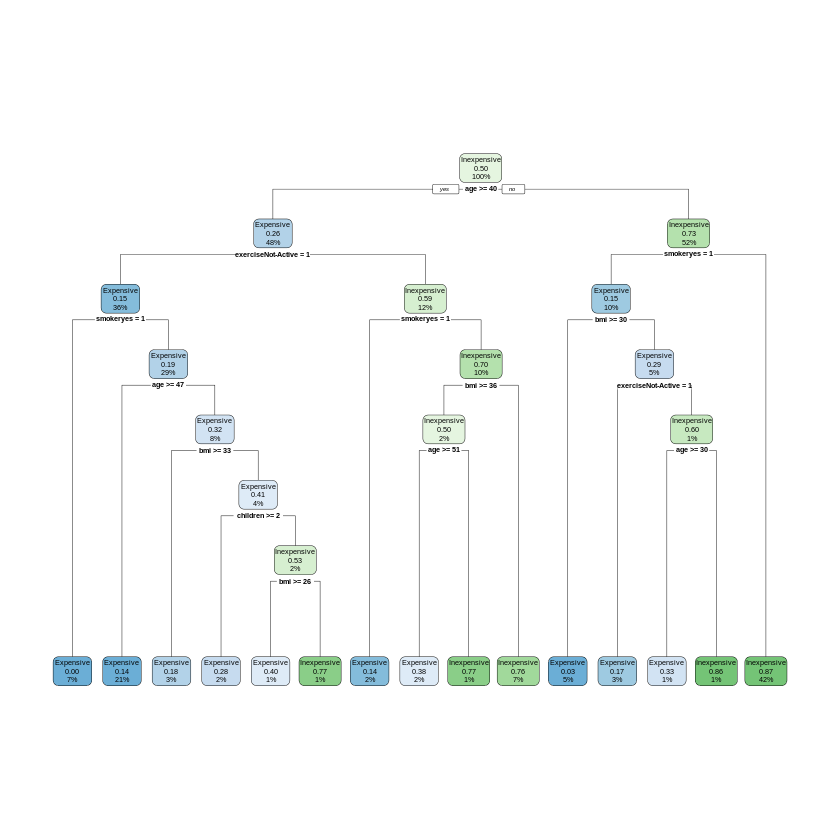

In [ ]:
Tree<- train(cost_category ~smoker + bmi + age + children + location_type + education_level + yearly_physical + exercise + married + hypertension + gender
  , method = "rpart"
  , data =trainData
  , tuneLength=10) 

rpart.plot(Tree$finalModel)

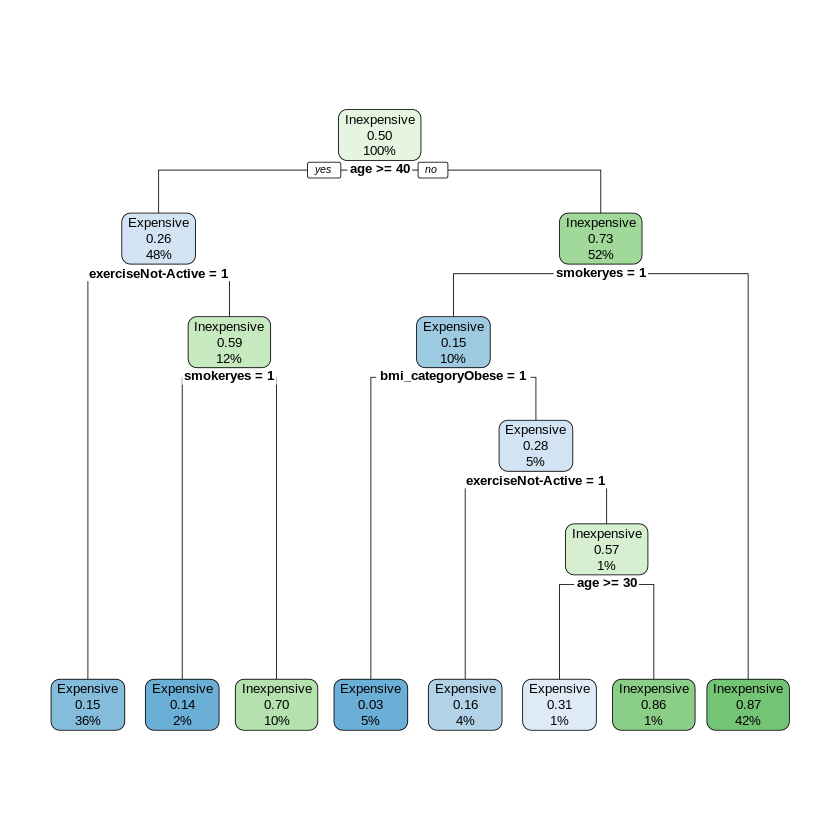

In [ ]:
Tree<- train(cost_category ~smoker + bmi_category + age + children + exercise + married + hypertension + gender
  , method = "rpart"
  , data =trainData
  , tuneLength=6) 

rpart.plot(Tree$finalModel)

In [ ]:
str(trainData)

'data.frame':	5308 obs. of  21 variables:
 $ X              : int  1 3 4 7 9 10 11 12 13 14 ...
 $ age            : int  18 27 34 47 36 59 24 61 22 57 ...
 $ bmi            : num  27.9 33 22.7 33.4 29.8 ...
 $ children       : int  0 3 0 1 2 0 0 0 0 0 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 2 1 1 ...
 $ location       : chr  "CONNECTICUT" "MASSACHUSETTS" "PENNSYLVANIA" "PENNSYLVANIA" ...
 $ location_type  : Factor w/ 2 levels "Country","Urban": 2 2 1 2 2 1 2 2 2 2 ...
 $ education_level: Factor w/ 4 levels "Bachelor","Master",..: 1 2 2 1 1 1 1 3 1 1 ...
 $ yearly_physical: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 2 ...
 $ exercise       : Factor w/ 2 levels "Active","Not-Active": 1 1 2 2 1 2 1 1 2 2 ...
 $ married        : Factor w/ 2 levels "Married","Not_Married": 1 1 1 1 1 1 1 1 1 1 ...
 $ hypertension   : num  0 0 1 0 0 1 0 0 0 0 ...
 $ gender         : Factor w/ 2 levels "female","male": 1 2 2 1 2 1 2 1 2 1 ...
 $ cost           : int  1746 576

To conclude,
We built linear model ( with multiple combinations),

SVM (with multiple combinations),

decision tree,

Apriori,

on the HMO dataset.
The best model is SVM and it is what will be used for us to determine the actionable insights. 

#Actionable Insights
We want to target obese old adults and old adults to have a reduced premium cost if they take a part in HMO collaborations for health services. These collaborations will be established in selected locations based on our cost and location map plotting.

Similarly, young adults and adults would be targetted for corresponding health programs for reduced premiums and dependent cost if they sign up for partnet exercise plans, partner yearly physical tests. These programs would be promoted in locations with high concetration of adults and young adults.
 